In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib
%matplotlib inline

import matplotlib.pyplot as plt
sns.set(style = "whitegrid") #font_scale = 1.3)

from IPython.display import set_matplotlib_formats

import warnings
warnings.filterwarnings("ignore")


# Mac OS를 이용하고 있기 떄문에 AppleGothic을 설정했습니다.
# 윈도우의 경우 다른 폰트를 사용해주셔야 합니다. 나눔폰트가 있는 경우 'NanumGothic' 없는 경우에는 'Malgun Gothic'을 사용해주세요.
# matplotlib.rc('font', family='AppleGothic')
matplotlib.rc('font', family='Malgun Gothic')

# 폰트를 바꿀 경우 마이너스가 표시되지 않는 경우도 있는데 이를 막아주는 코드입니다.
matplotlib.rc('axes', unicode_minus=False)
matplotlib.rcParams['axes.unicode_minus'] = False

# retina 옵션을 통해 해상도를 올립니다.
set_matplotlib_formats('retina')

# 화면에 출력하는 데이터 프레임의 최대 row 수를 500으로 설정합니다.
pd.set_option('display.max_rows', 500)

# 화면에 출력하는 데이터 프레임의 최대 column 수를 500으로 설정합니다.
pd.set_option('display.max_columns', 500)

In [2]:
train = pd.read_csv('data/real_real_train.csv', index_col = [0], encoding = 'euc-kr')

df_han = train[['gu', 'dong', 'transaction_real_price', 'hanriver', 'rebuilding', 'diff_year']]
df_han

,gu,dong,transaction_real_price,hanriver,rebuilding,river_re,diff_year
0,송파구,가락동,1500,0,0,1,16
1,송파구,가락동,5000,0,0,1,28
2,송파구,가락동,5000,0,1,2,30
3,송파구,가락동,5000,0,1,2,31
4,송파구,가락동,6000,0,1,2,30
...,...,...,...,...,...,...,...
742280,중구,흥인동,180208,0,0,1,2
742281,중구,흥인동,186091,0,0,1,2
742282,중구,흥인동,209128,0,0,1,2
742283,중구,흥인동,209854,0,0,1,2


In [18]:
train.head()

,Unnamed: 0.1,gu,dong,apartment_id,apt,exclusive_use_area,year_of_completion,floor,transaction_real_price,hanriver,transaction_year,hakgun,exclusive_use_area_group,hakgun_rank,year_of_completion_group,pop,gu_area,diff_year,rebuilding,river_re,gu_mean,apt_age_group,dep_shop,강남과의 거리,kangnam,subway_distance,hospital_distance,park_distance,sub_dis_group,hos_dis_group,park_gu_count
0,0,송파구,가락동,11072,풍림1,80.52,1995,5,1500,0,2011,6,2,3,1990,690466,33.88,16,0,1,69447,10,1,4.354,2,0.208855,0.328274,0.240551,1,1.0,25
1,1,송파구,가락동,7155,시영1,40.09,1980,5,5000,0,2008,6,1,3,1980,676580,33.88,28,0,1,69447,20,1,4.354,2,0.517188,1.832828,0.325262,2,4.0,25
2,2,송파구,가락동,7155,시영1,40.09,1980,2,5000,0,2010,6,1,3,1980,693144,33.88,30,1,2,69447,30,1,4.354,2,0.517188,1.832828,0.325262,2,4.0,25
3,3,송파구,가락동,7155,시영1,45.12,1980,1,5000,0,2011,6,1,3,1980,690466,33.88,31,1,2,69447,30,1,4.354,2,0.517188,1.832828,0.325262,2,4.0,25
4,4,송파구,가락동,7155,시영1,40.09,1980,2,6000,0,2010,6,1,3,1980,693144,33.88,30,1,2,69447,30,1,4.354,2,0.517188,1.832828,0.325262,2,4.0,25


In [3]:
df_yung = df_han.loc[df_han['gu'] == '영등포구']
df_mapo = df_han.loc[df_han['gu'] == '광진구']
df_kangseo = df_han.loc[df_han['gu'] == '강서구']
df_yung

,gu,dong,transaction_real_price,hanriver,rebuilding,river_re,diff_year
124770,영등포구,당산동,9400,1,0,1,0
124771,영등포구,당산동,9400,1,0,1,0
124772,영등포구,당산동,9600,1,0,1,2
124773,영등포구,당산동,9600,1,0,1,2
124774,영등포구,당산동,9600,1,0,1,2
...,...,...,...,...,...,...,...
534382,영등포구,영등포동8가,85000,0,0,1,6
534383,영등포구,영등포동8가,88000,0,0,1,6
534384,영등포구,영등포동8가,91000,0,0,1,5
534385,영등포구,영등포동8가,102000,0,0,1,4


In [4]:
yung_dong = list(df_yung['dong'].unique())
mapo_dong = list(df_mapo['dong'].unique())
kangseo_dong = list(df_kangseo['dong'].unique())
yung_dong

['당산동',
 '당산동1가',
 '당산동2가',
 '당산동3가',
 '당산동4가',
 '당산동5가',
 '당산동6가',
 '대림동',
 '도림동',
 '문래동2가',
 '문래동3가',
 '문래동4가',
 '문래동5가',
 '문래동6가',
 '신길동',
 '양평동1가',
 '양평동2가',
 '양평동3가',
 '양평동4가',
 '양평동5가',
 '양평동6가',
 '여의도동',
 '영등포동',
 '영등포동1가',
 '영등포동2가',
 '영등포동3가',
 '영등포동4가',
 '영등포동5가',
 '영등포동7가',
 '영등포동8가']

In [5]:
df_yung['dong_mean'] = 0
for i in yung_dong:
    df_yung['dong_mean'] = np.where(df_yung['dong'] == i, round(df_yung.loc[df_yung['dong'] == i]['transaction_real_price'].mean()), df_yung['dong_mean'])
    
df_mapo['dong_mean'] = 0
for i in mapo_dong:
    df_mapo['dong_mean'] = np.where(df_mapo['dong'] == i, round(df_mapo.loc[df_mapo['dong'] == i]['transaction_real_price'].mean()), df_mapo['dong_mean'])
    
df_kangseo['dong_mean'] = 0
for i in kangseo_dong:
    df_kangseo['dong_mean'] = np.where(df_kangseo['dong'] == i, round(df_kangseo.loc[df_kangseo['dong'] == i]['transaction_real_price'].mean()), df_kangseo['dong_mean'])

In [6]:
df_a = df_yung.sort_values(by = ['dong_mean'], ascending = False)[['dong', 'dong_mean', 'hanriver']].drop_duplicates()
df_a

df_b = df_mapo.sort_values(by = ['dong_mean'], ascending = False)[['dong', 'dong_mean', 'hanriver']].drop_duplicates()
df_b

df_c = df_kangseo.sort_values(by = ['dong_mean'], ascending = False)[['dong', 'dong_mean', 'hanriver']].drop_duplicates()
df_c

,dong,dong_mean,hanriver
189191,마곡동,53522,1
110663,내발산동,41350,0
726225,화곡동,39749,0
529476,염창동,39418,1
61396,공항동,37077,0
184061,등촌동,36727,0
10851,가양동,32264,1
270518,방화동,29972,1


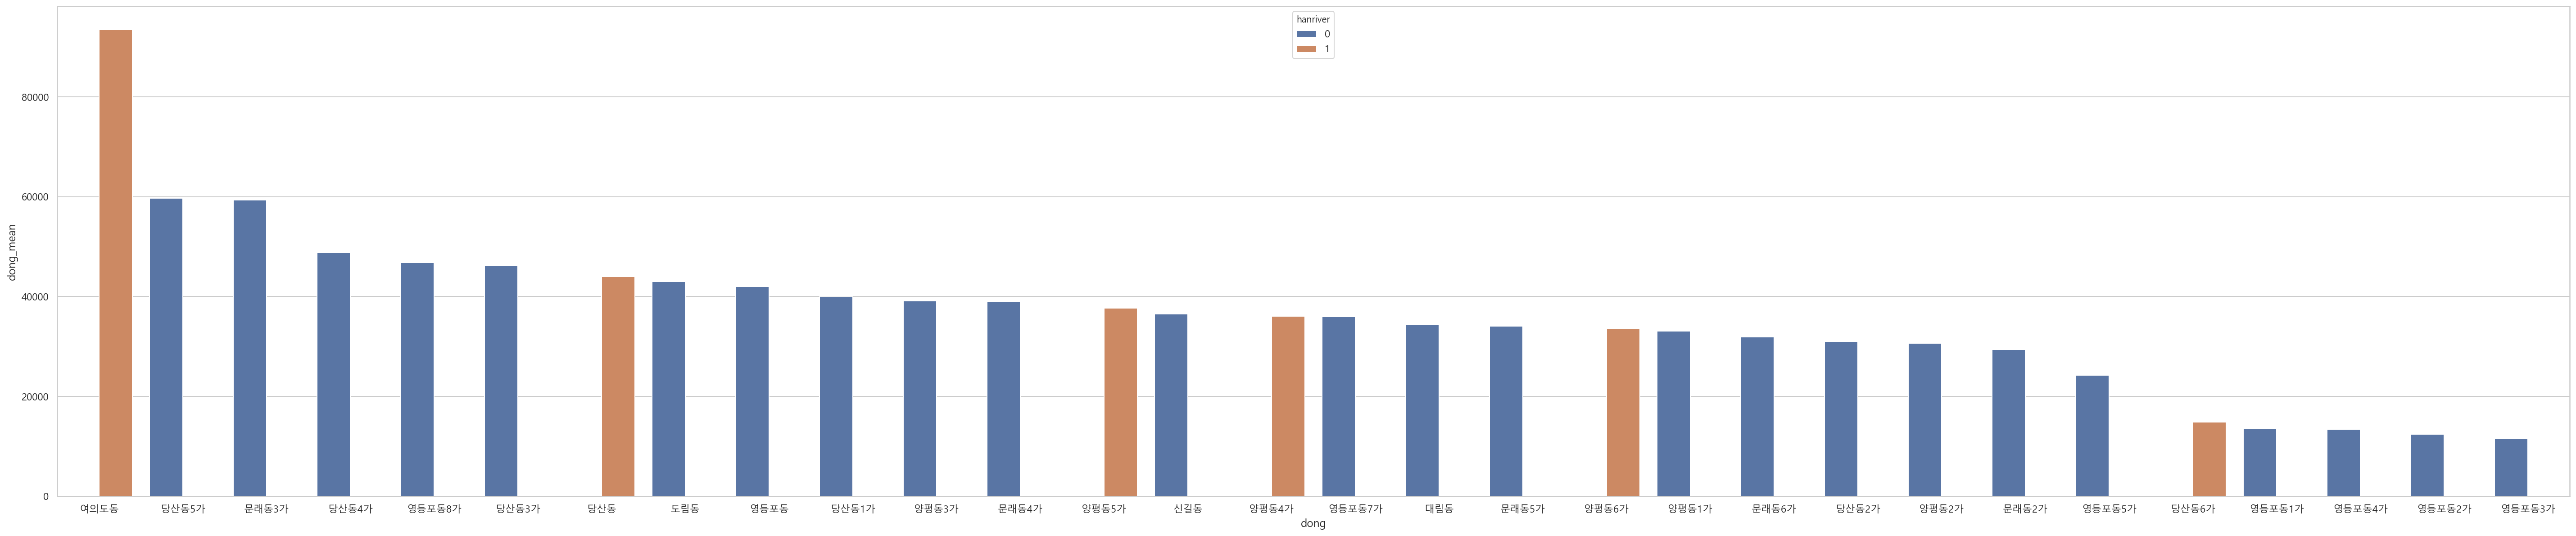

In [7]:
plt.figure(figsize=(50,10))
sns.barplot(data = df_a, x = 'dong', y = 'dong_mean', hue = 'hanriver')

### 영등포구의 '한강이 있는 동'과 '한강이 없는 동'의 가격 차이가 많이 나는 이유는 여의도동의 영향이 크다.

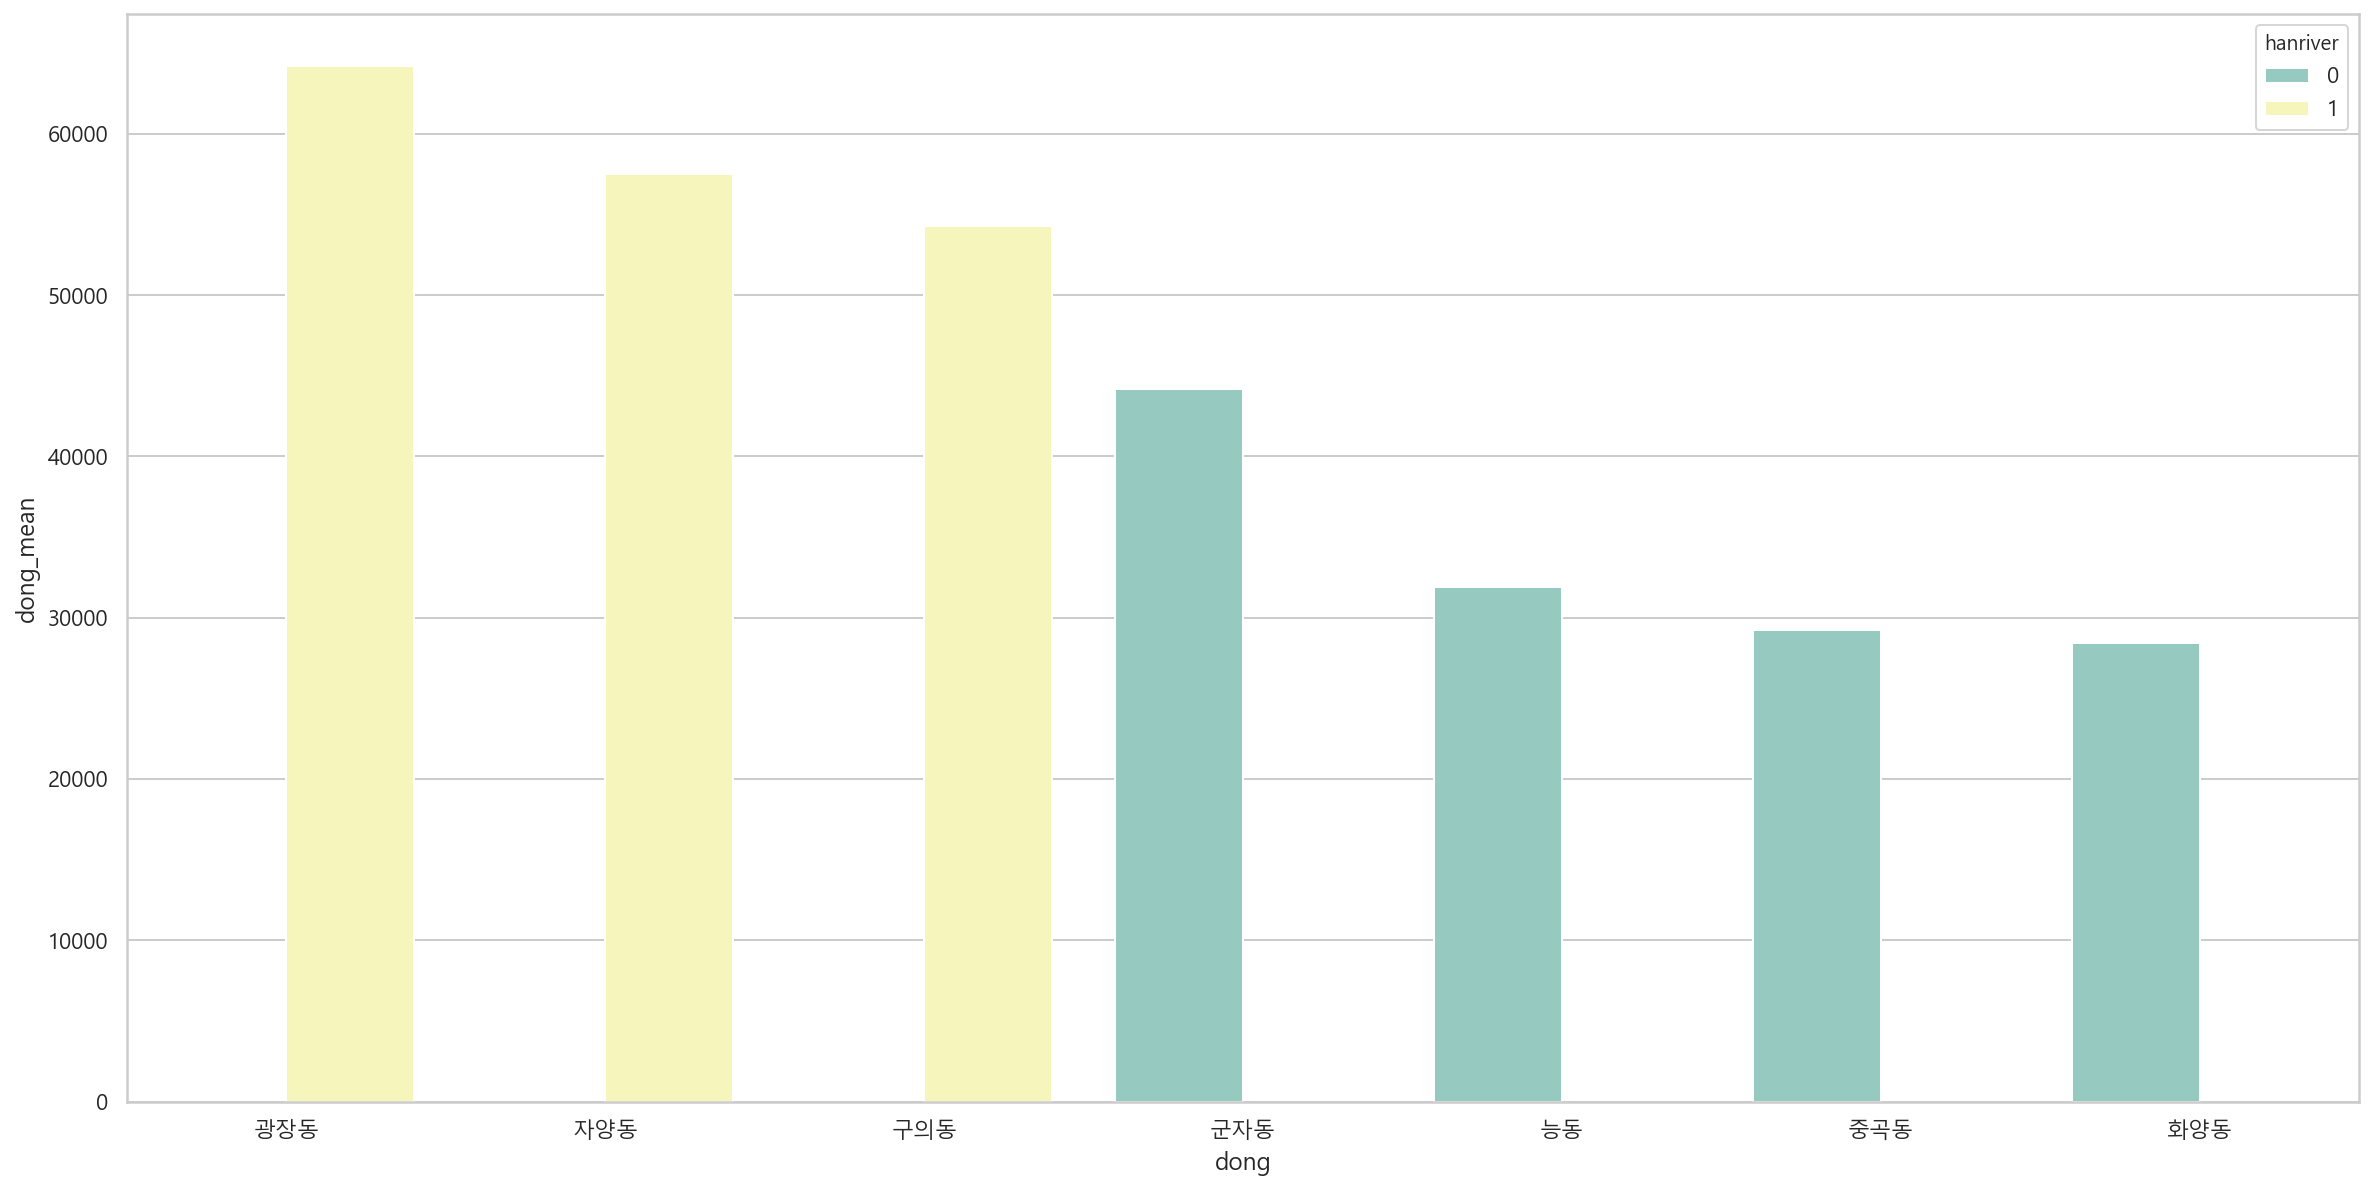

In [78]:
plt.figure(figsize=(20,10))
sns.barplot(data = df_b, x = 'dong', y = 'dong_mean', hue = 'hanriver', palette = 'Set3')

### 광진구의 한강과 가까운 동은 거의 강남이나 다름없다. (지도를 직접 보여줌)

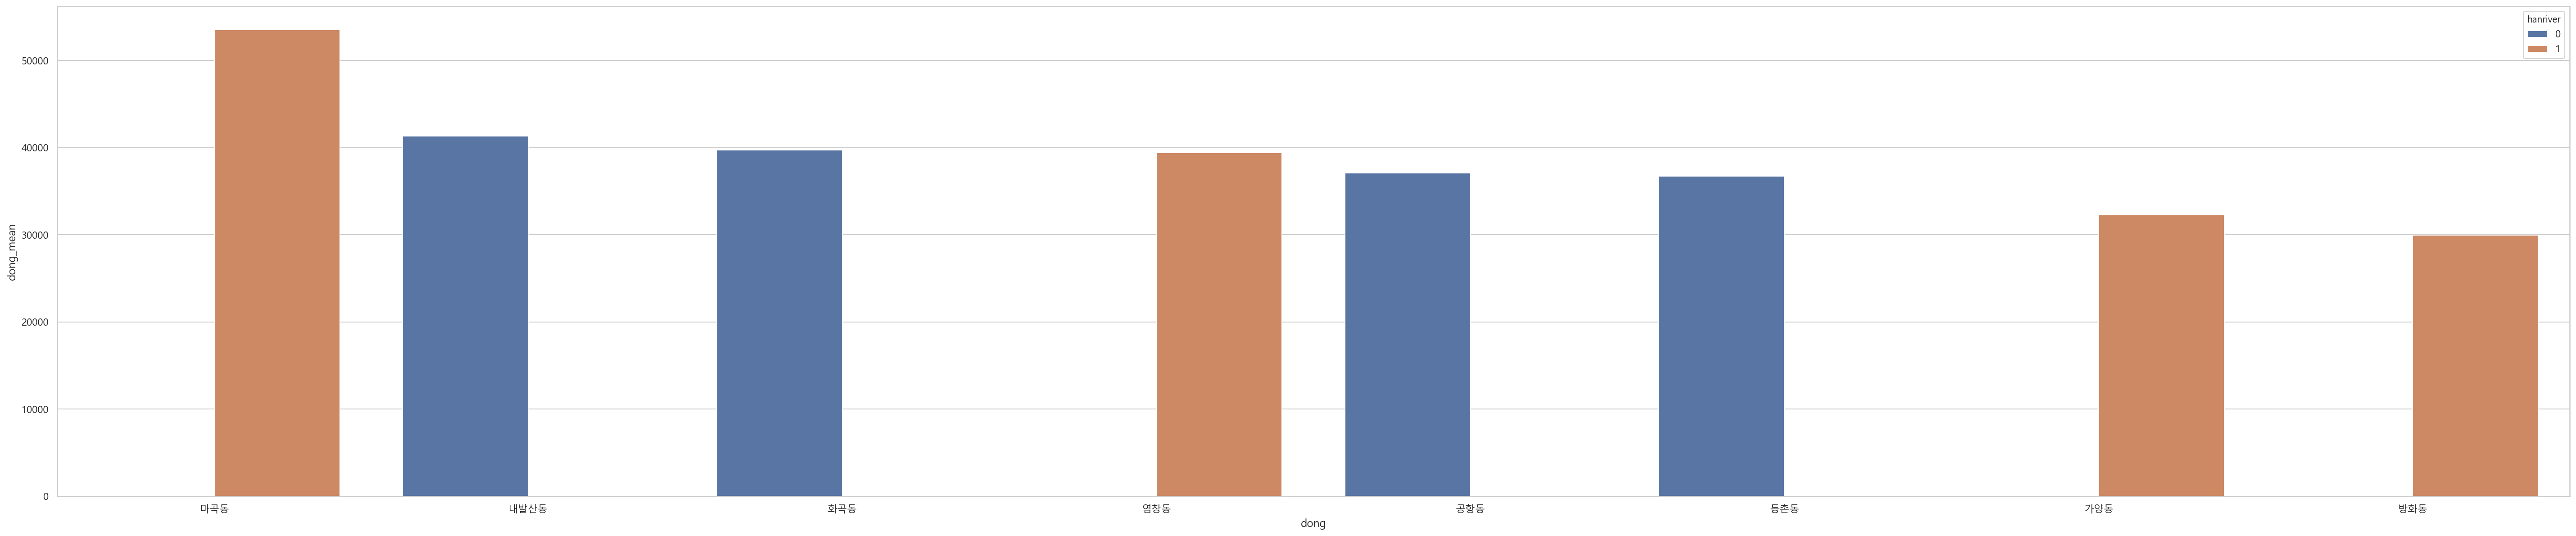

In [9]:
plt.figure(figsize=(50,10))
sns.barplot(data = df_c, x = 'dong', y = 'dong_mean', hue = 'hanriver')

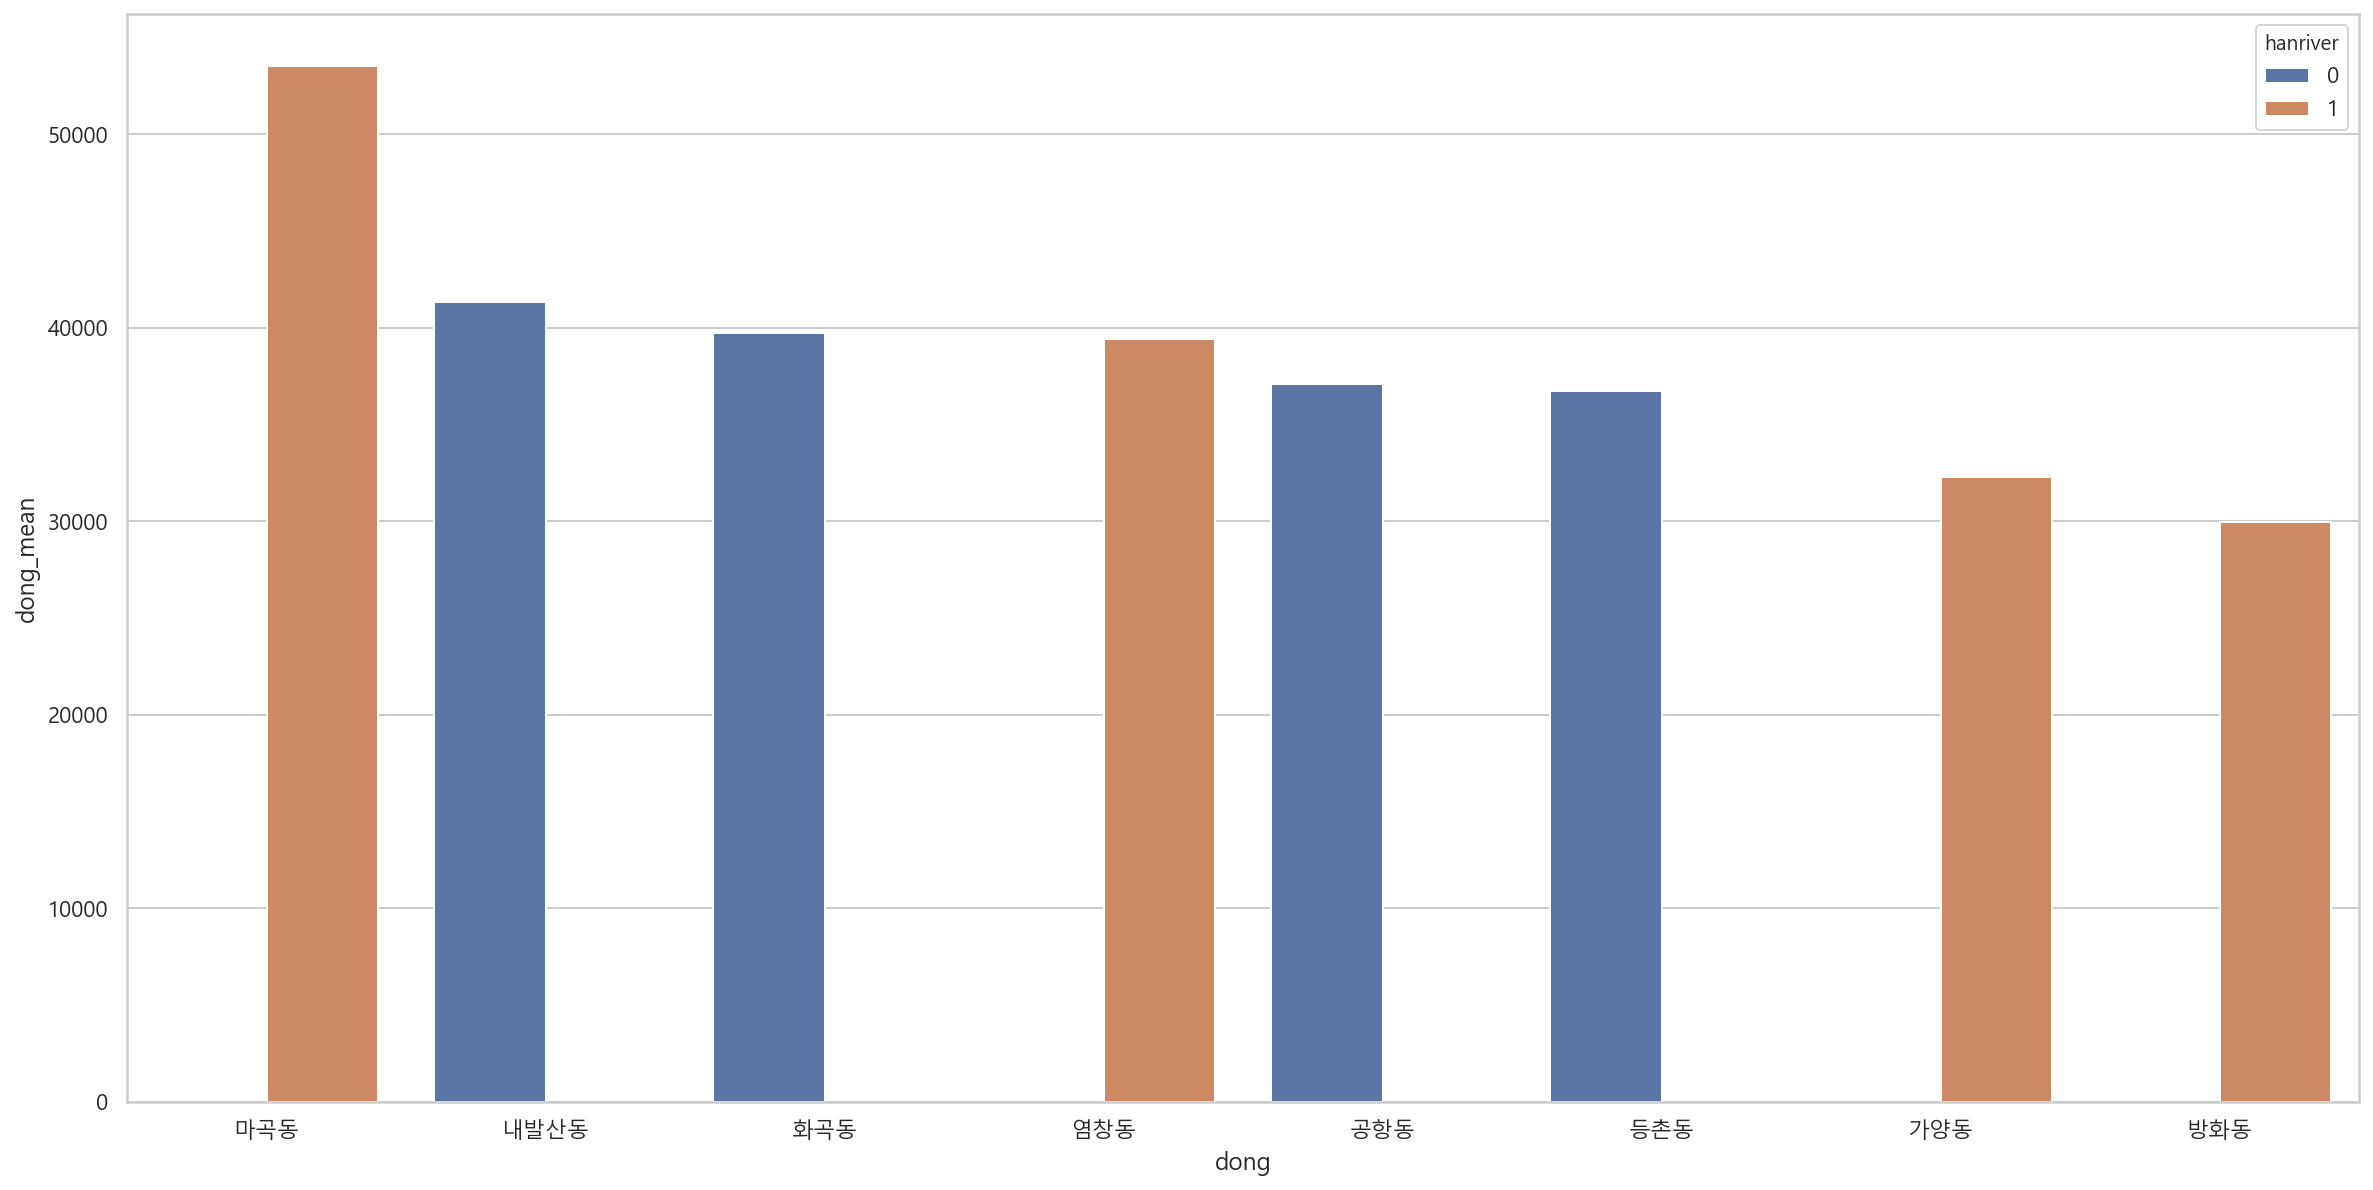

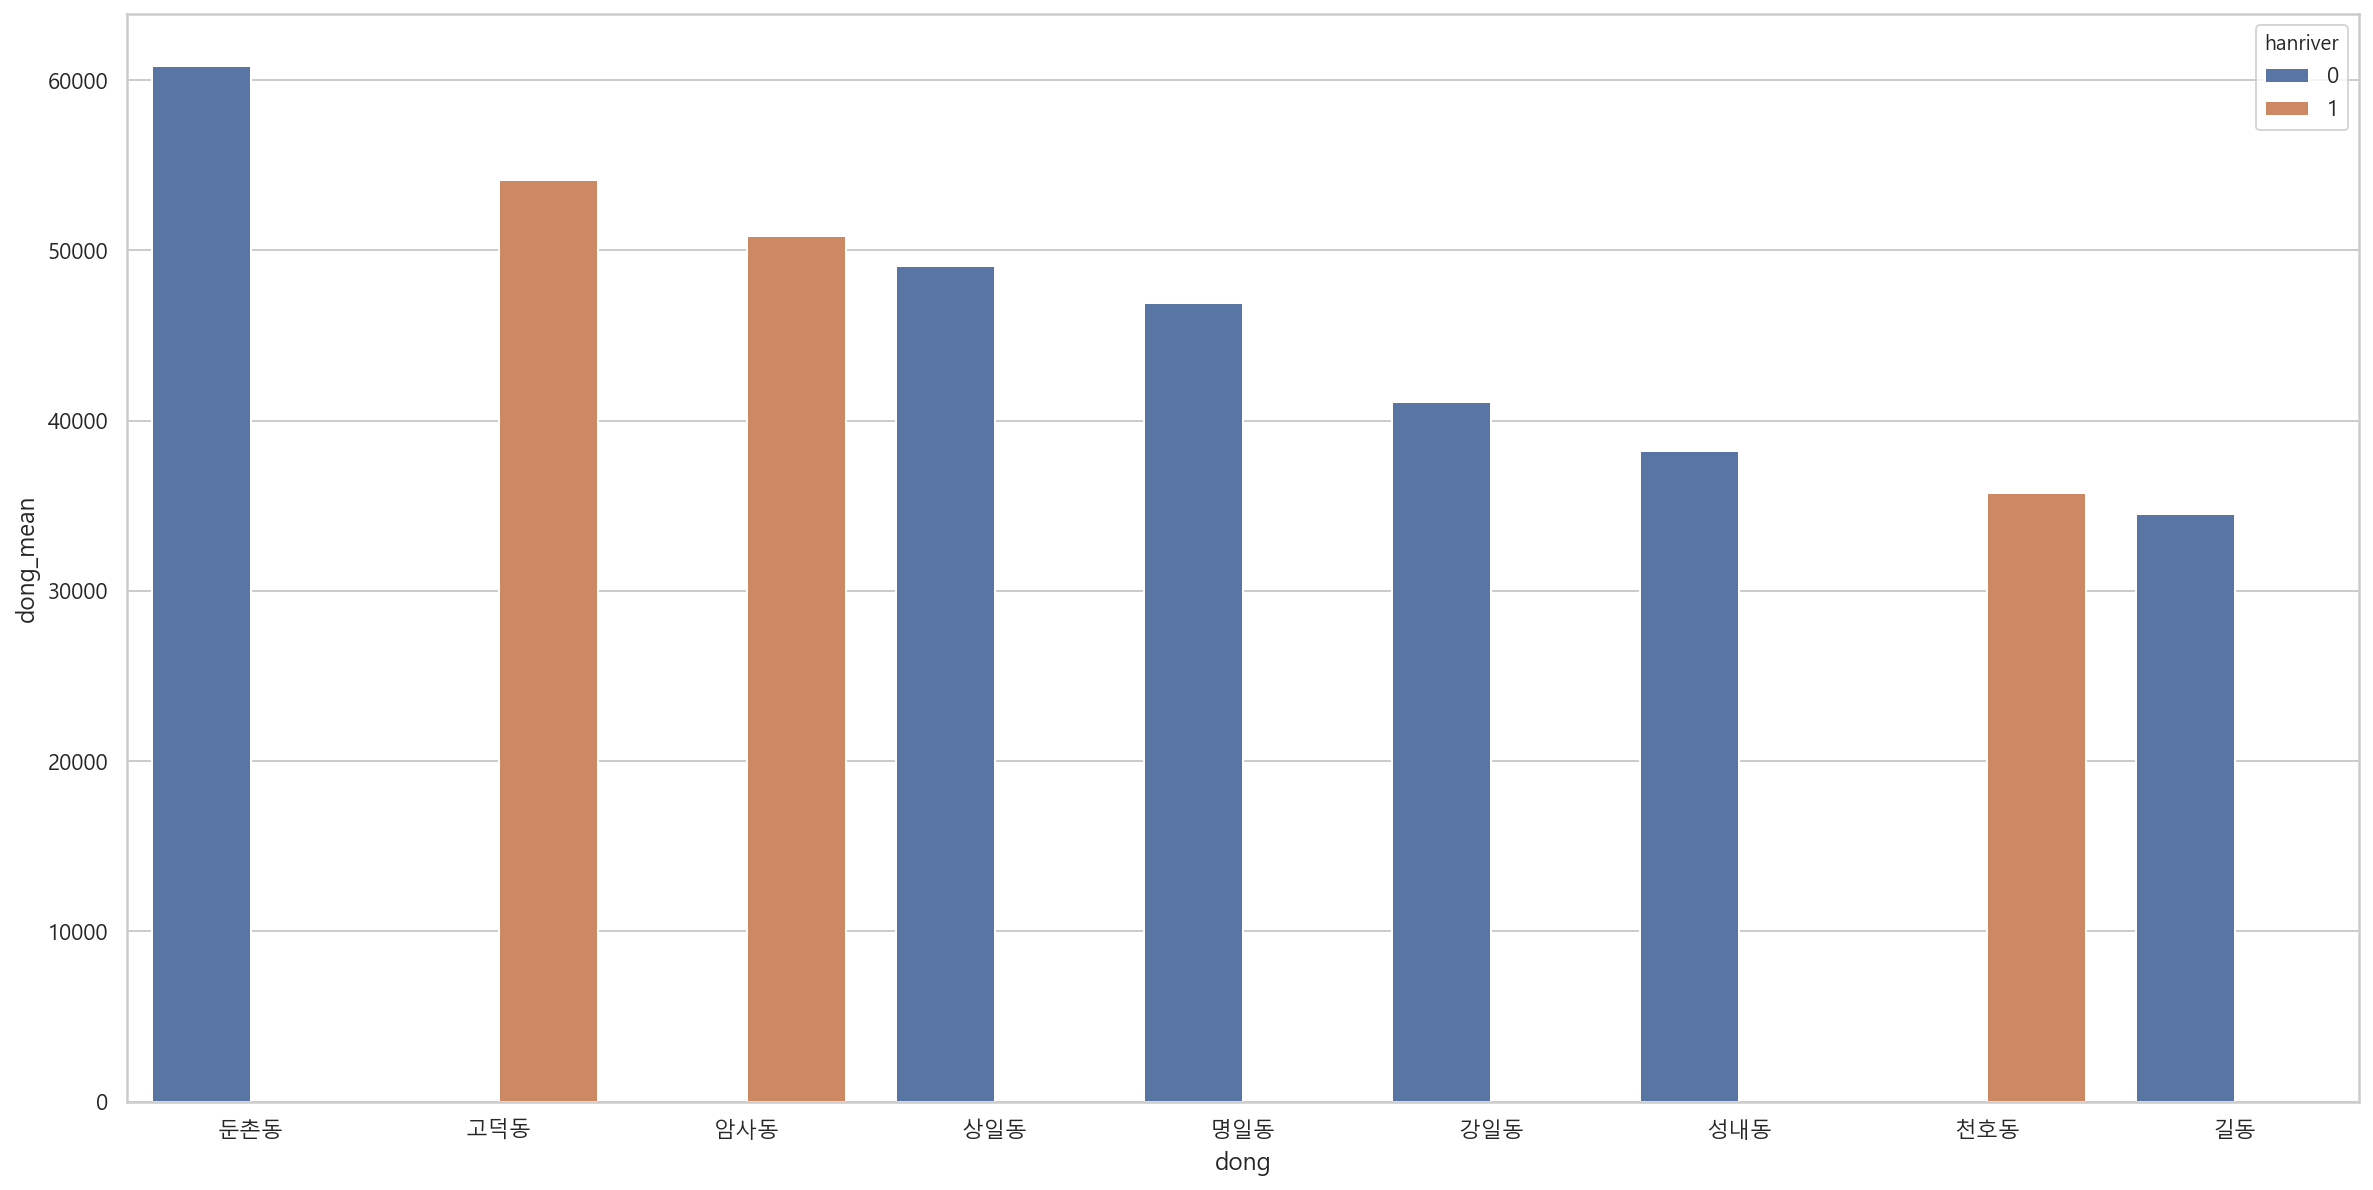

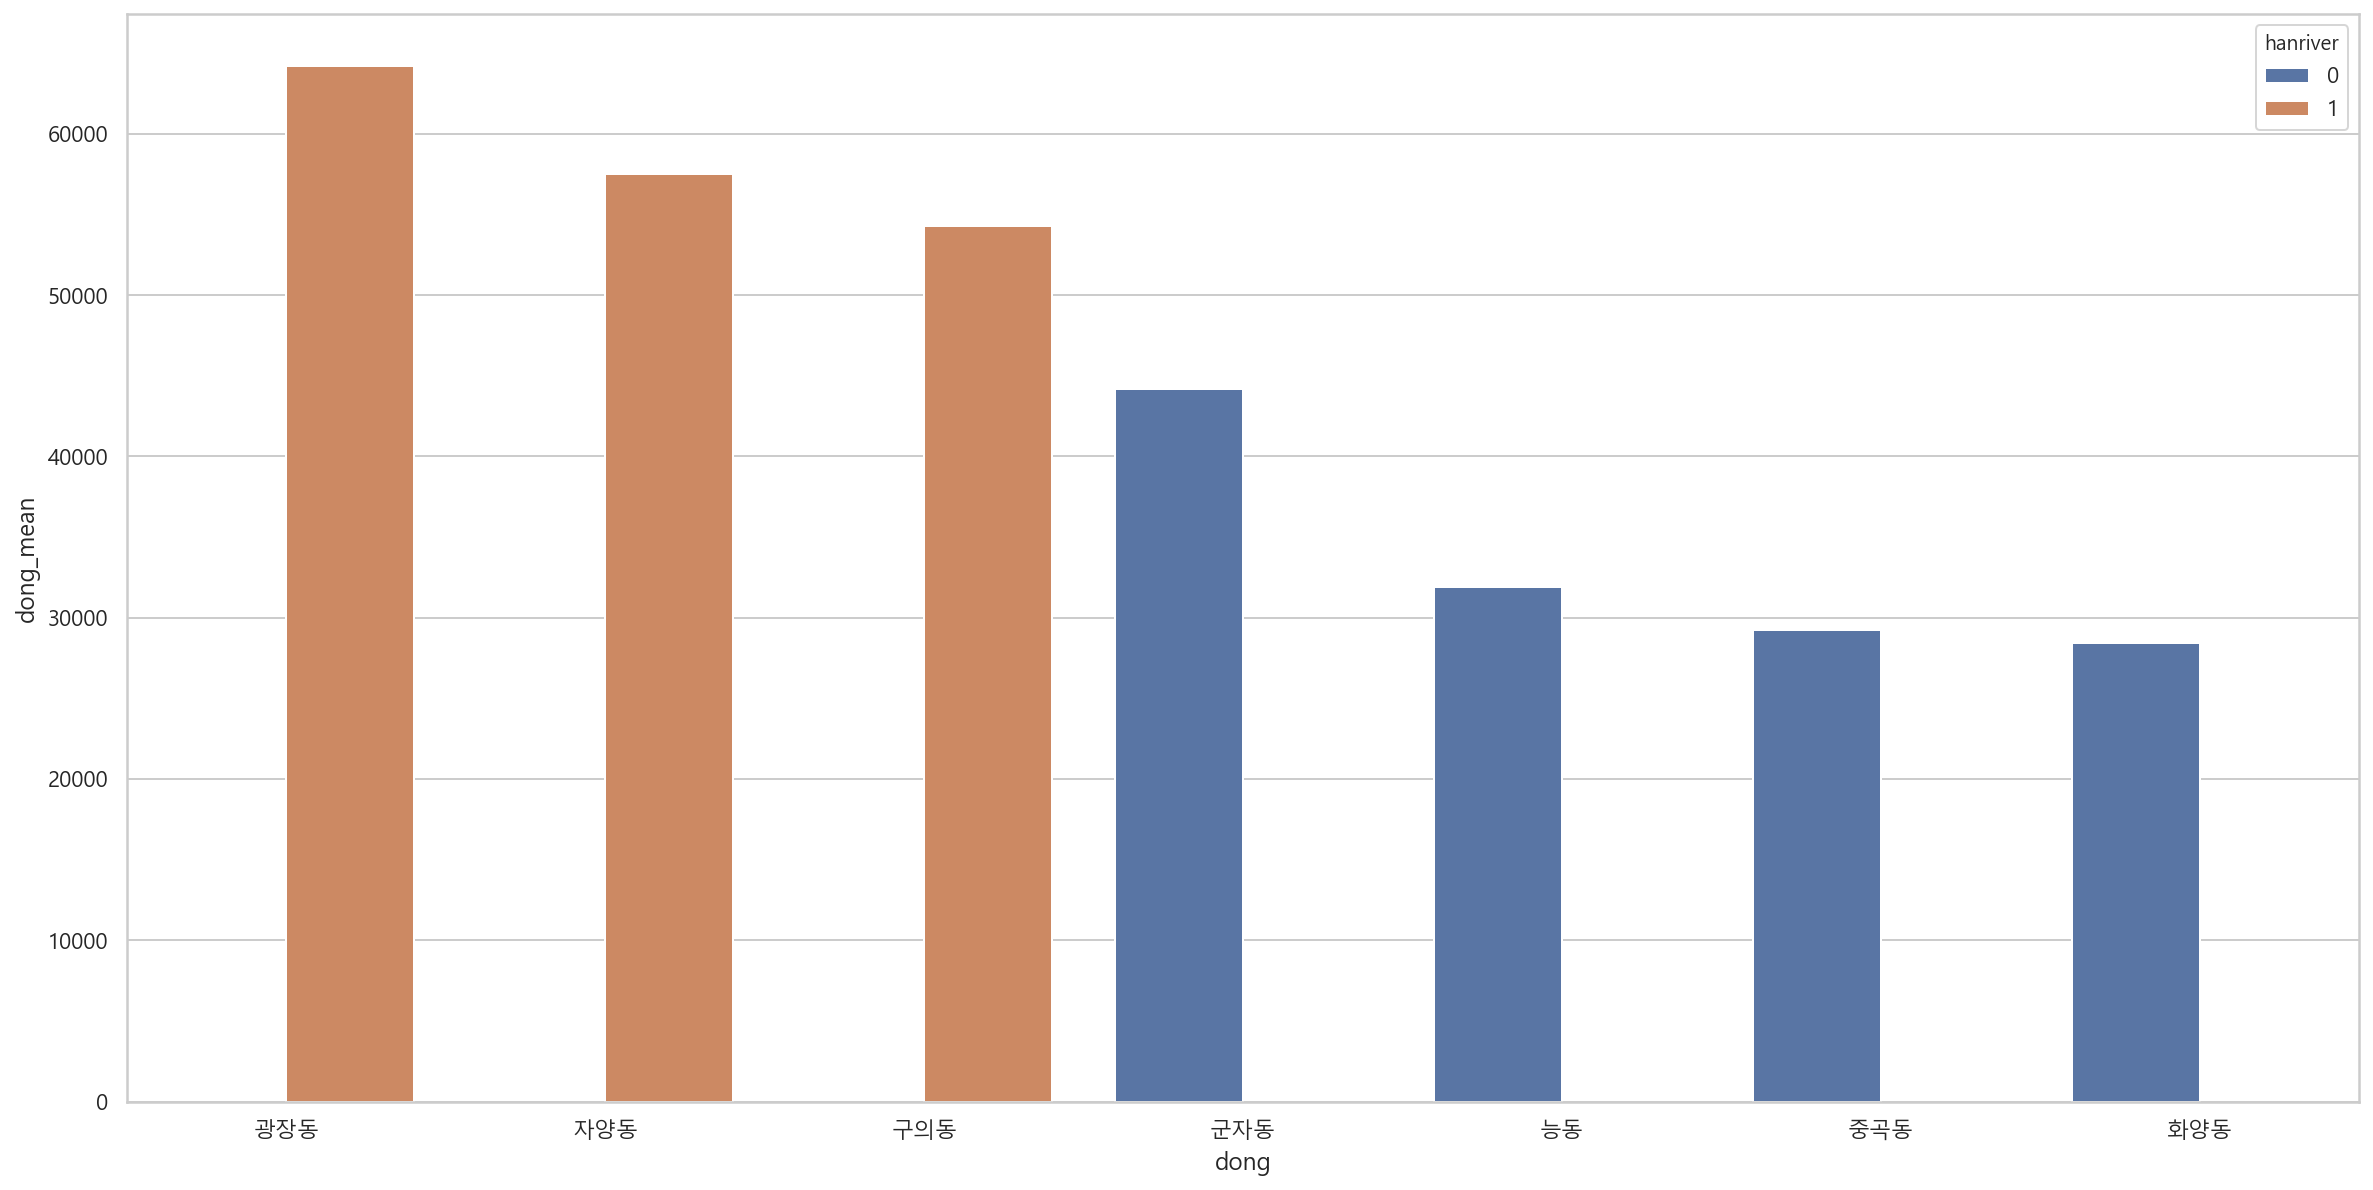

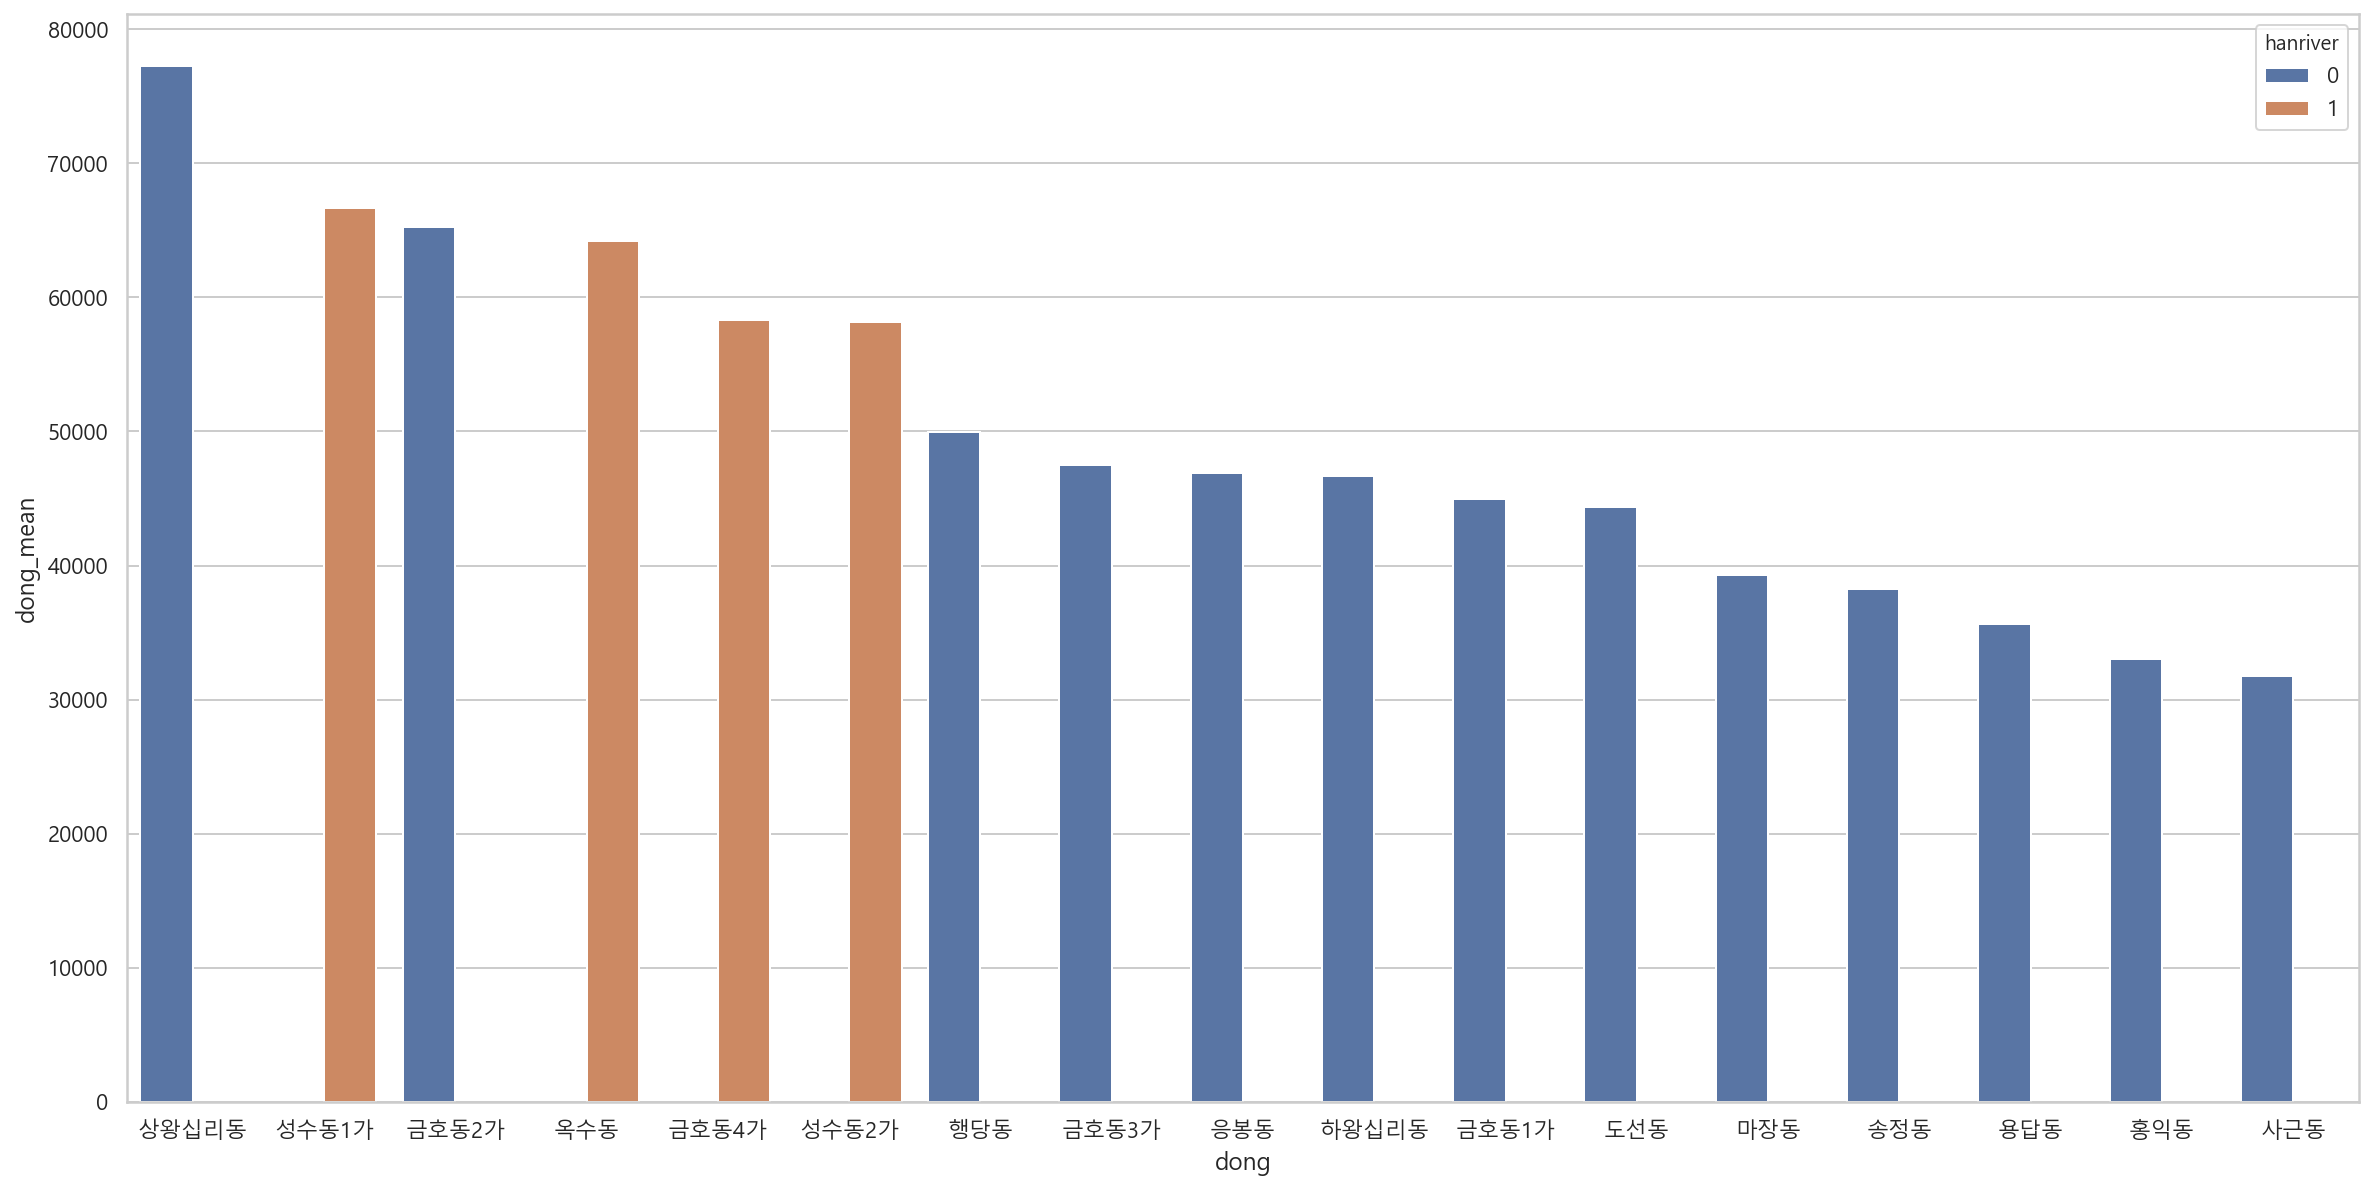

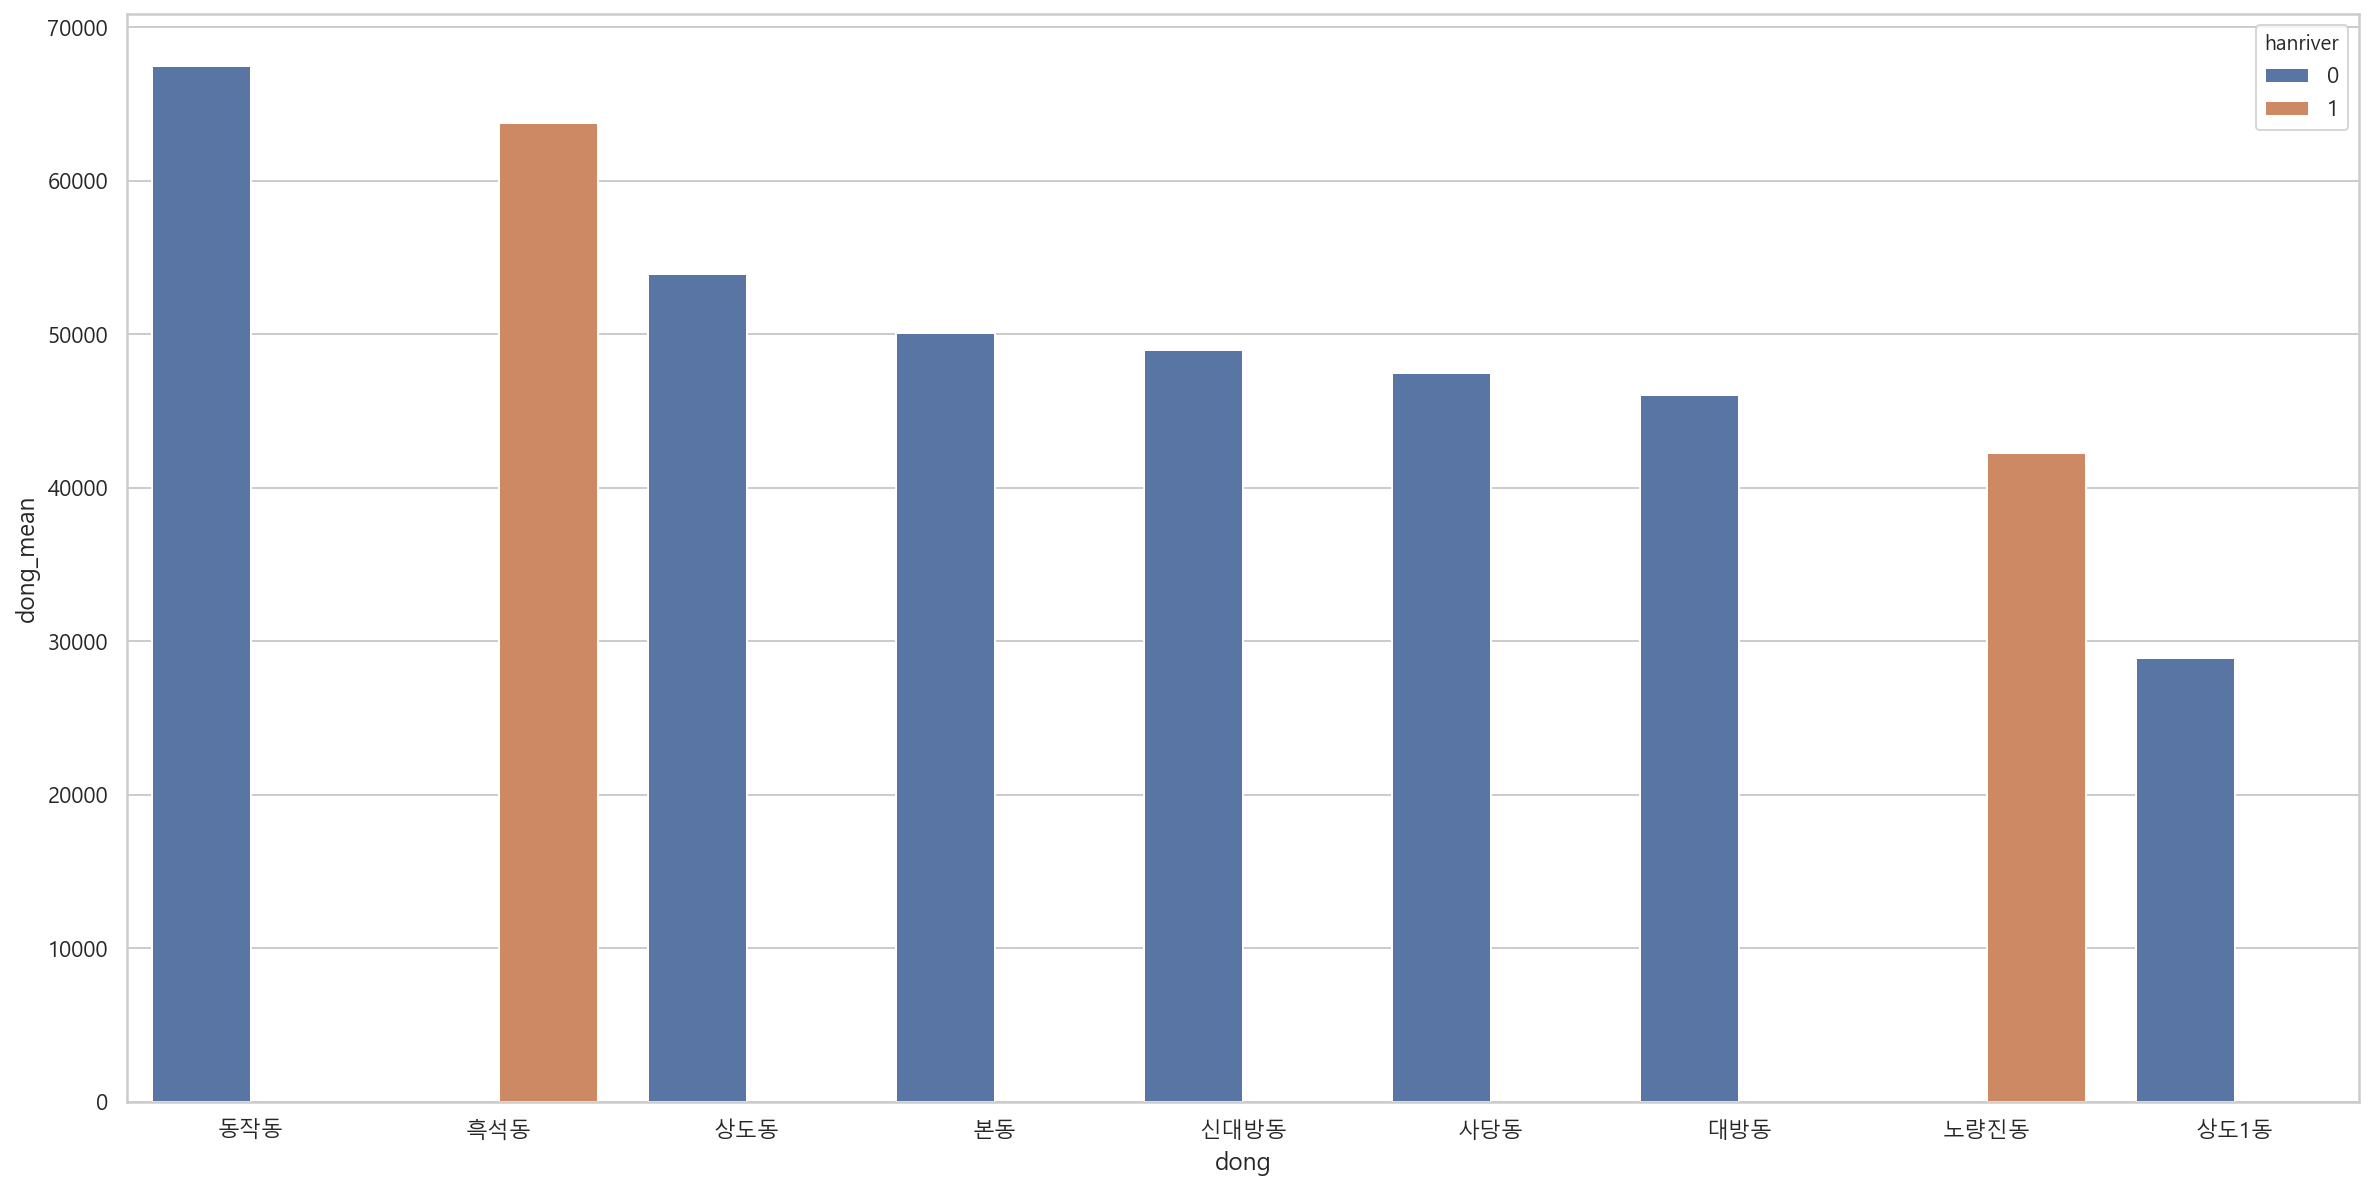

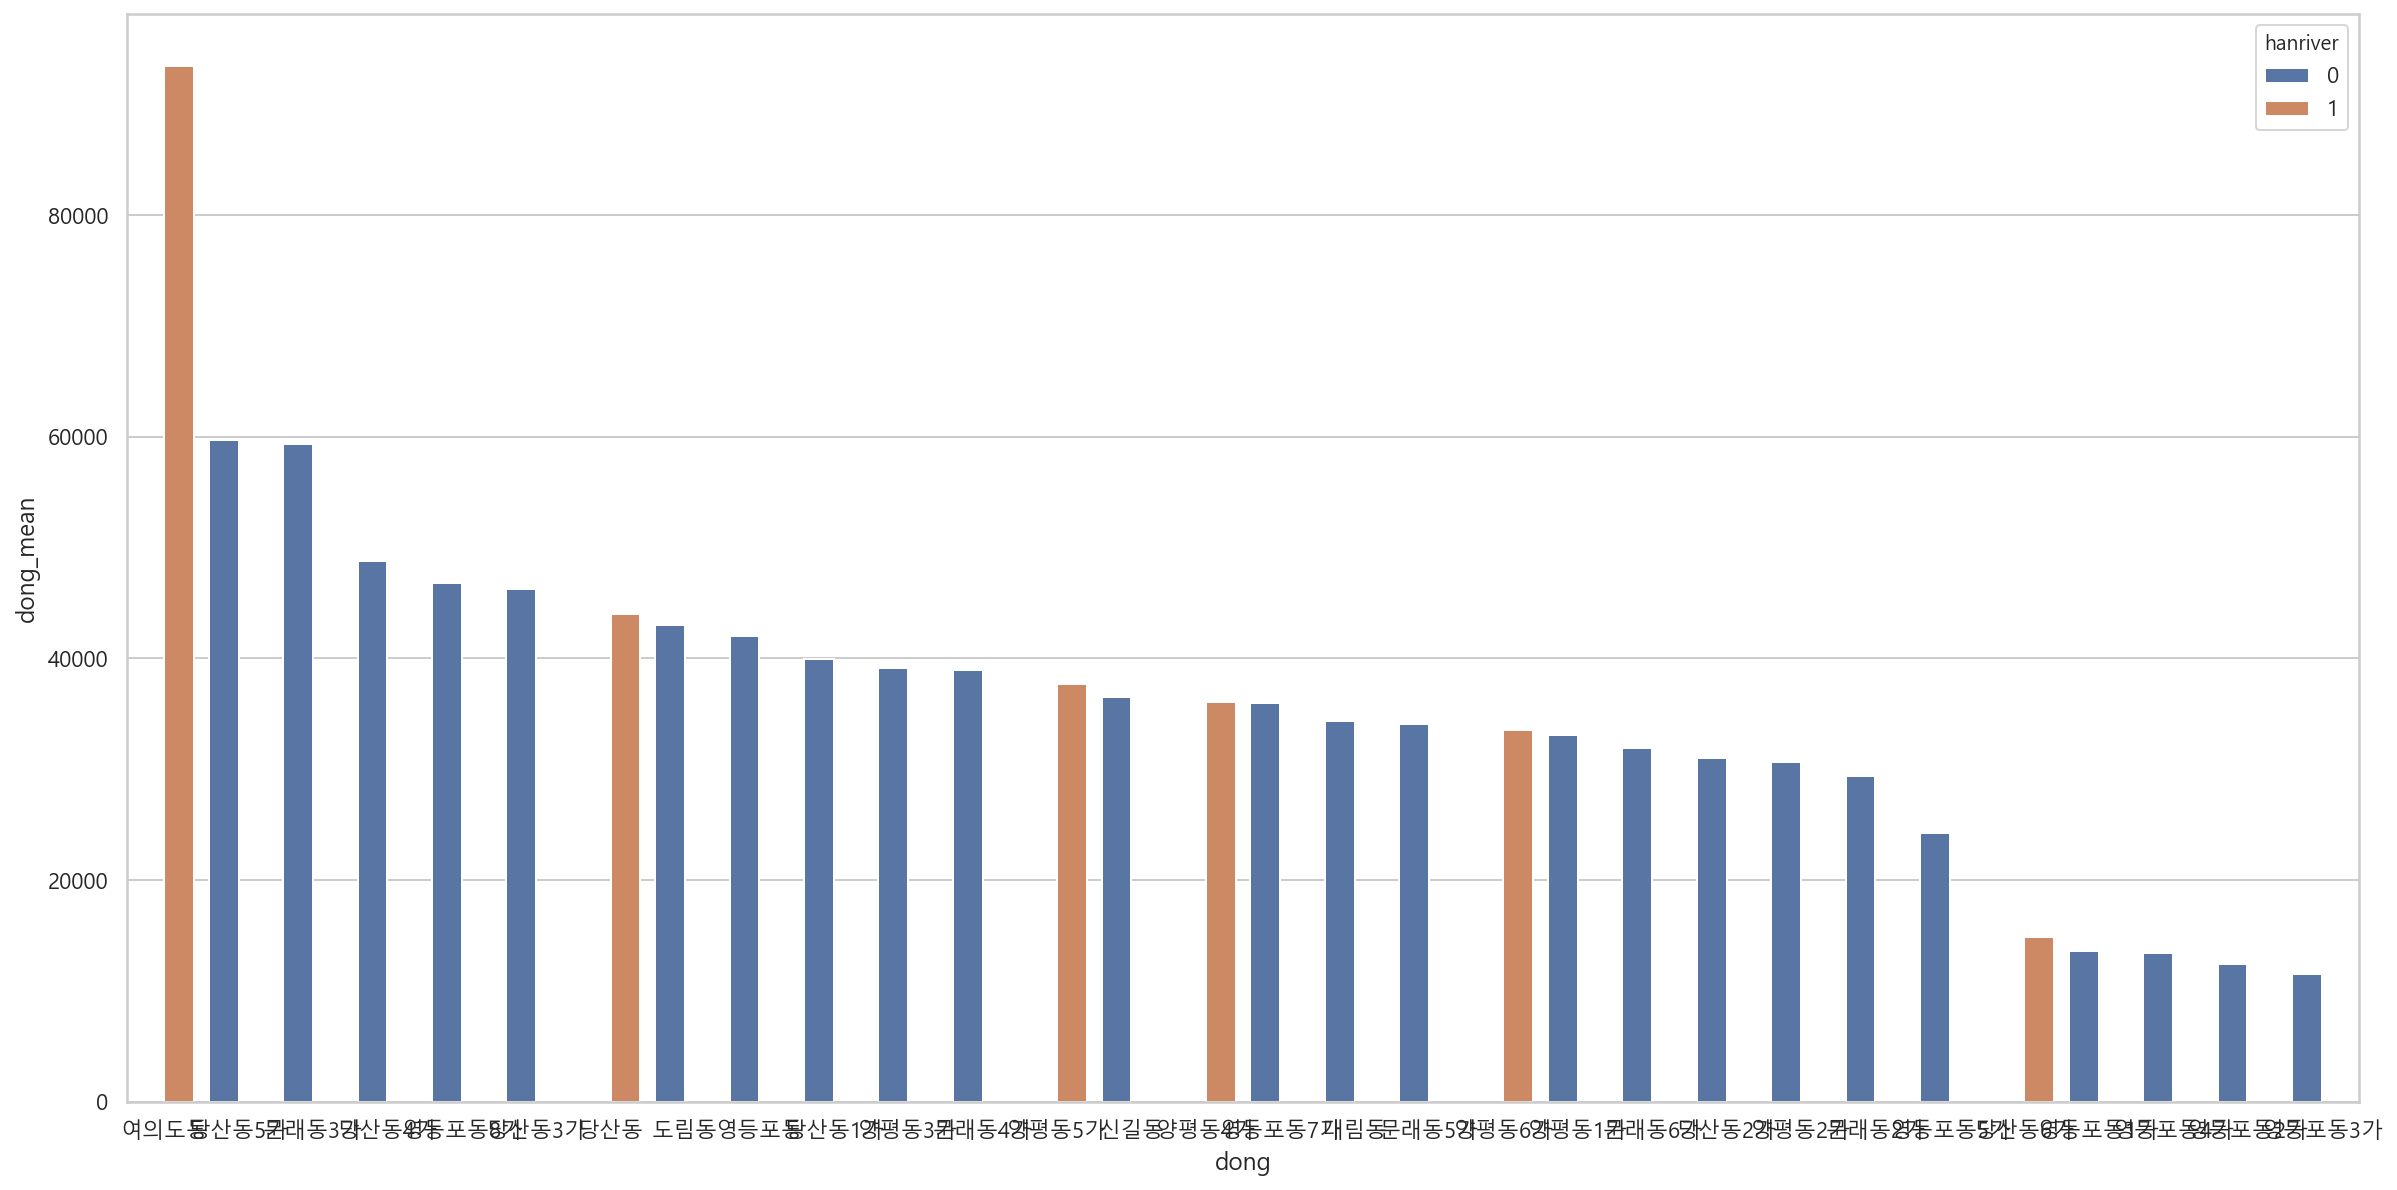

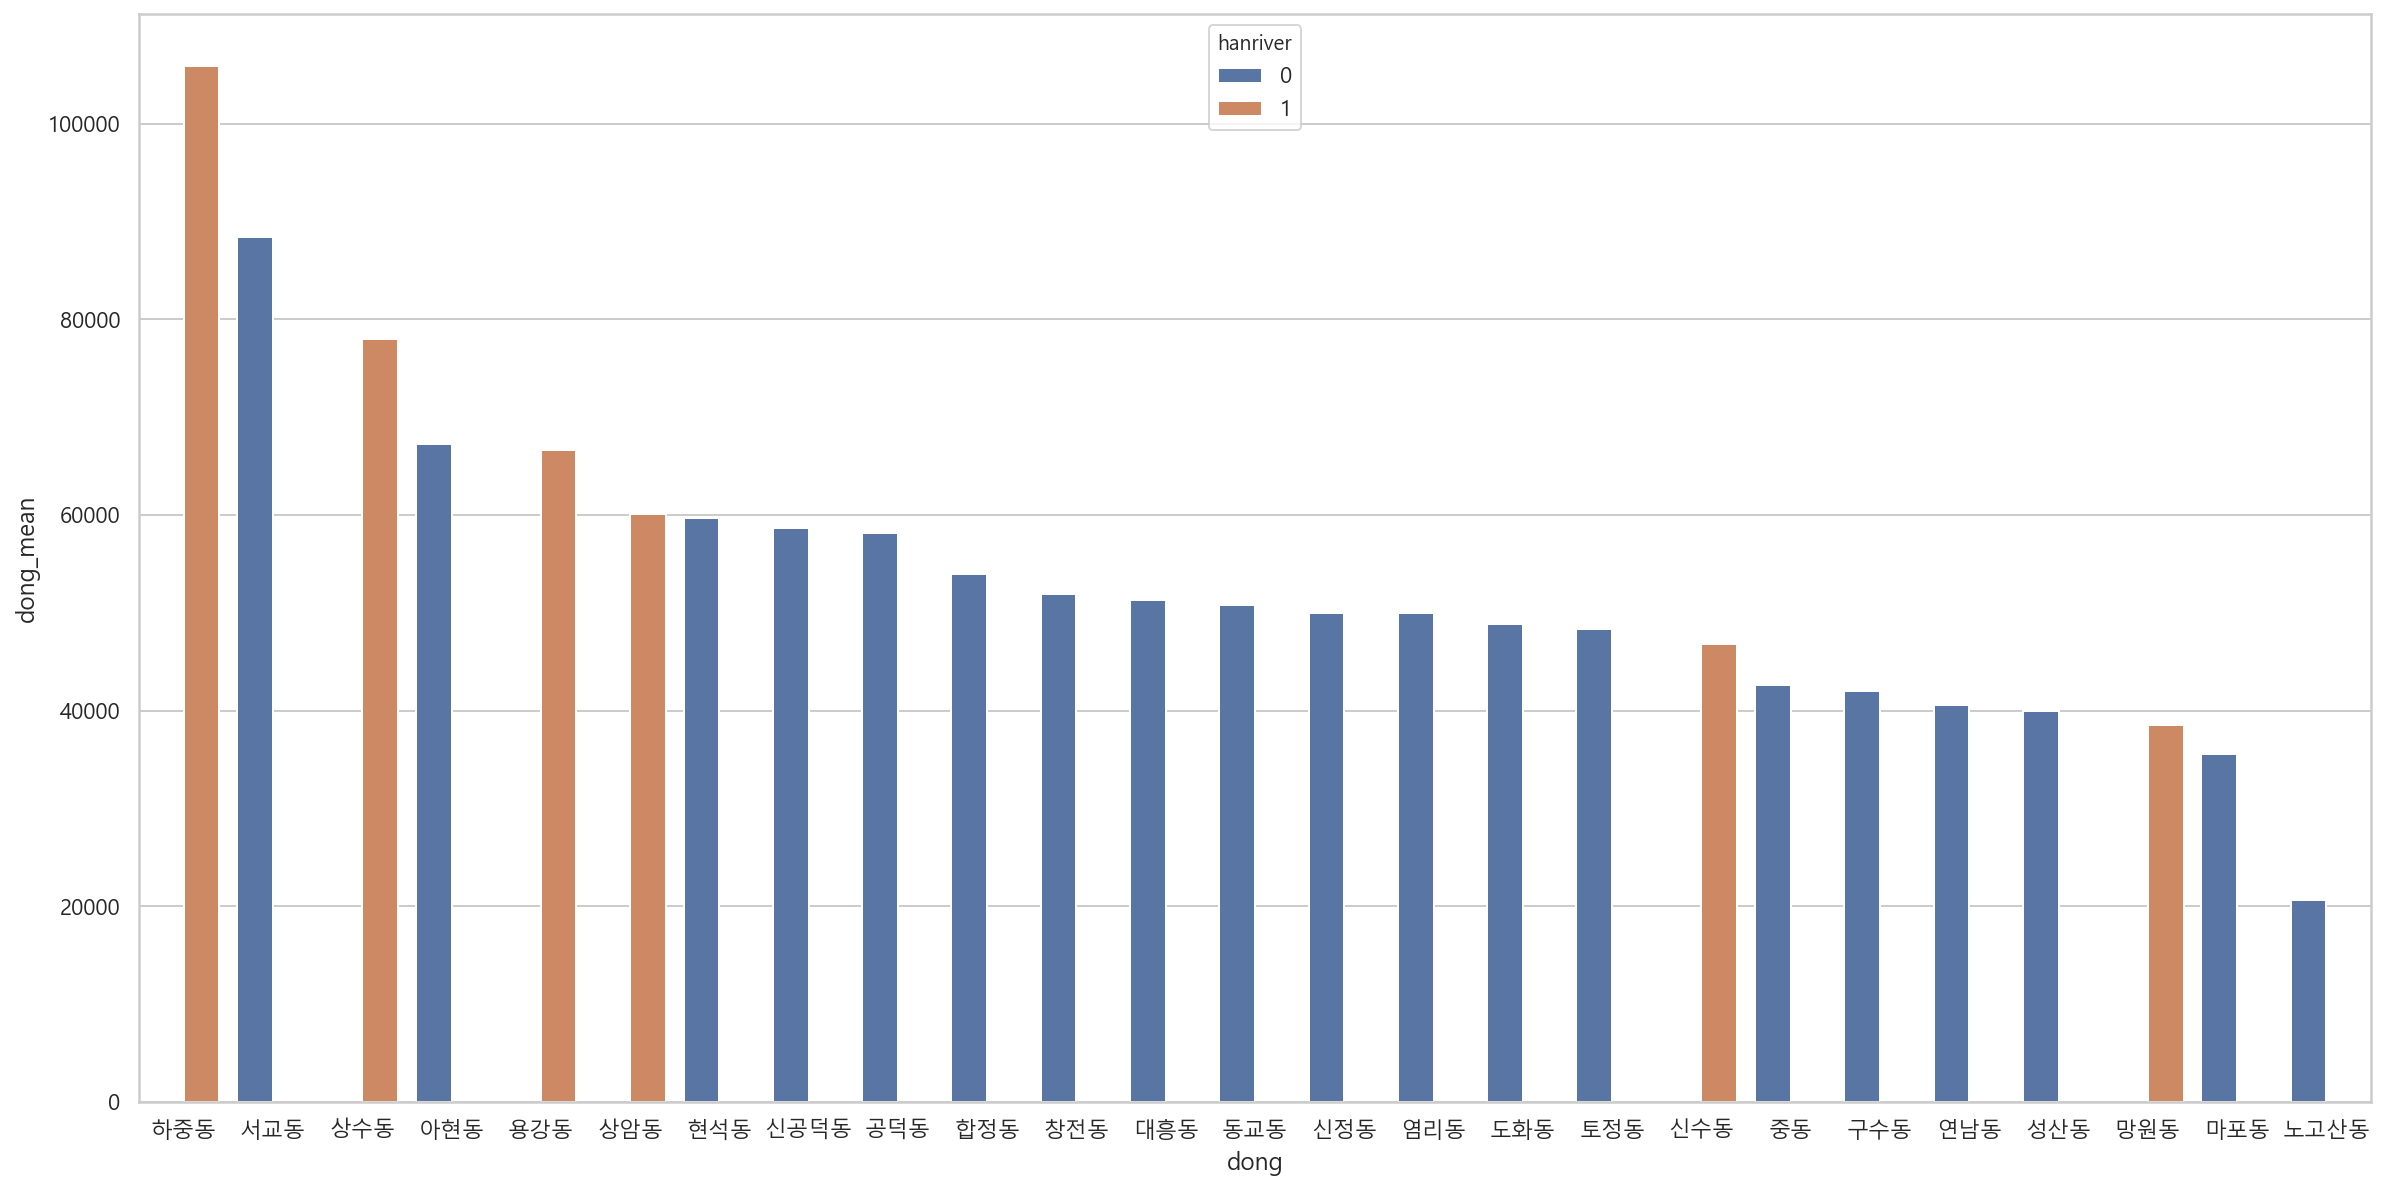

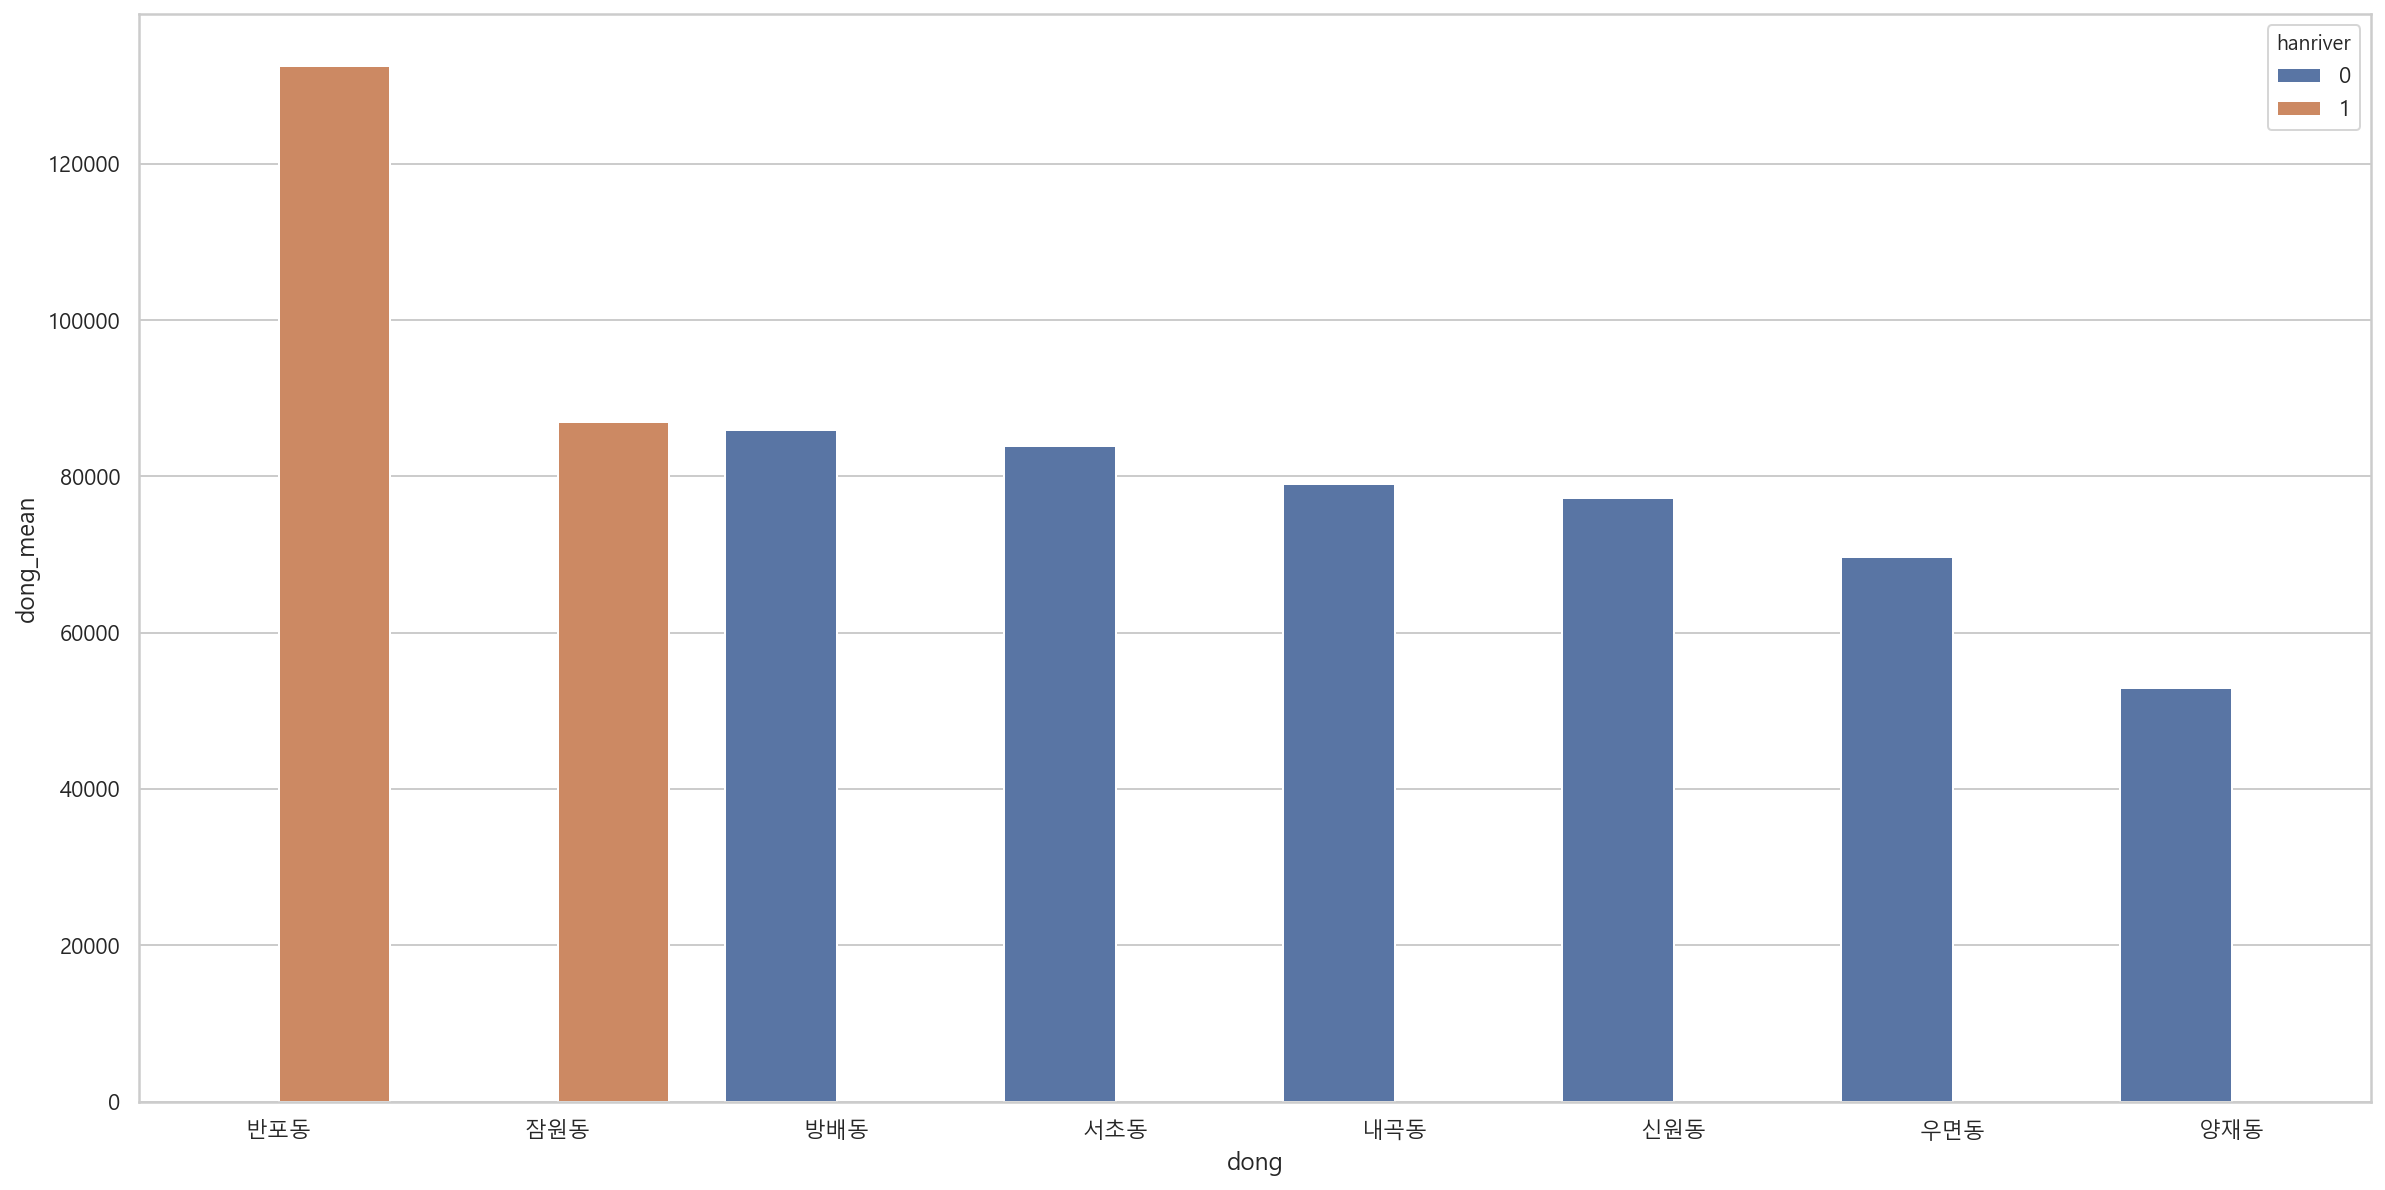

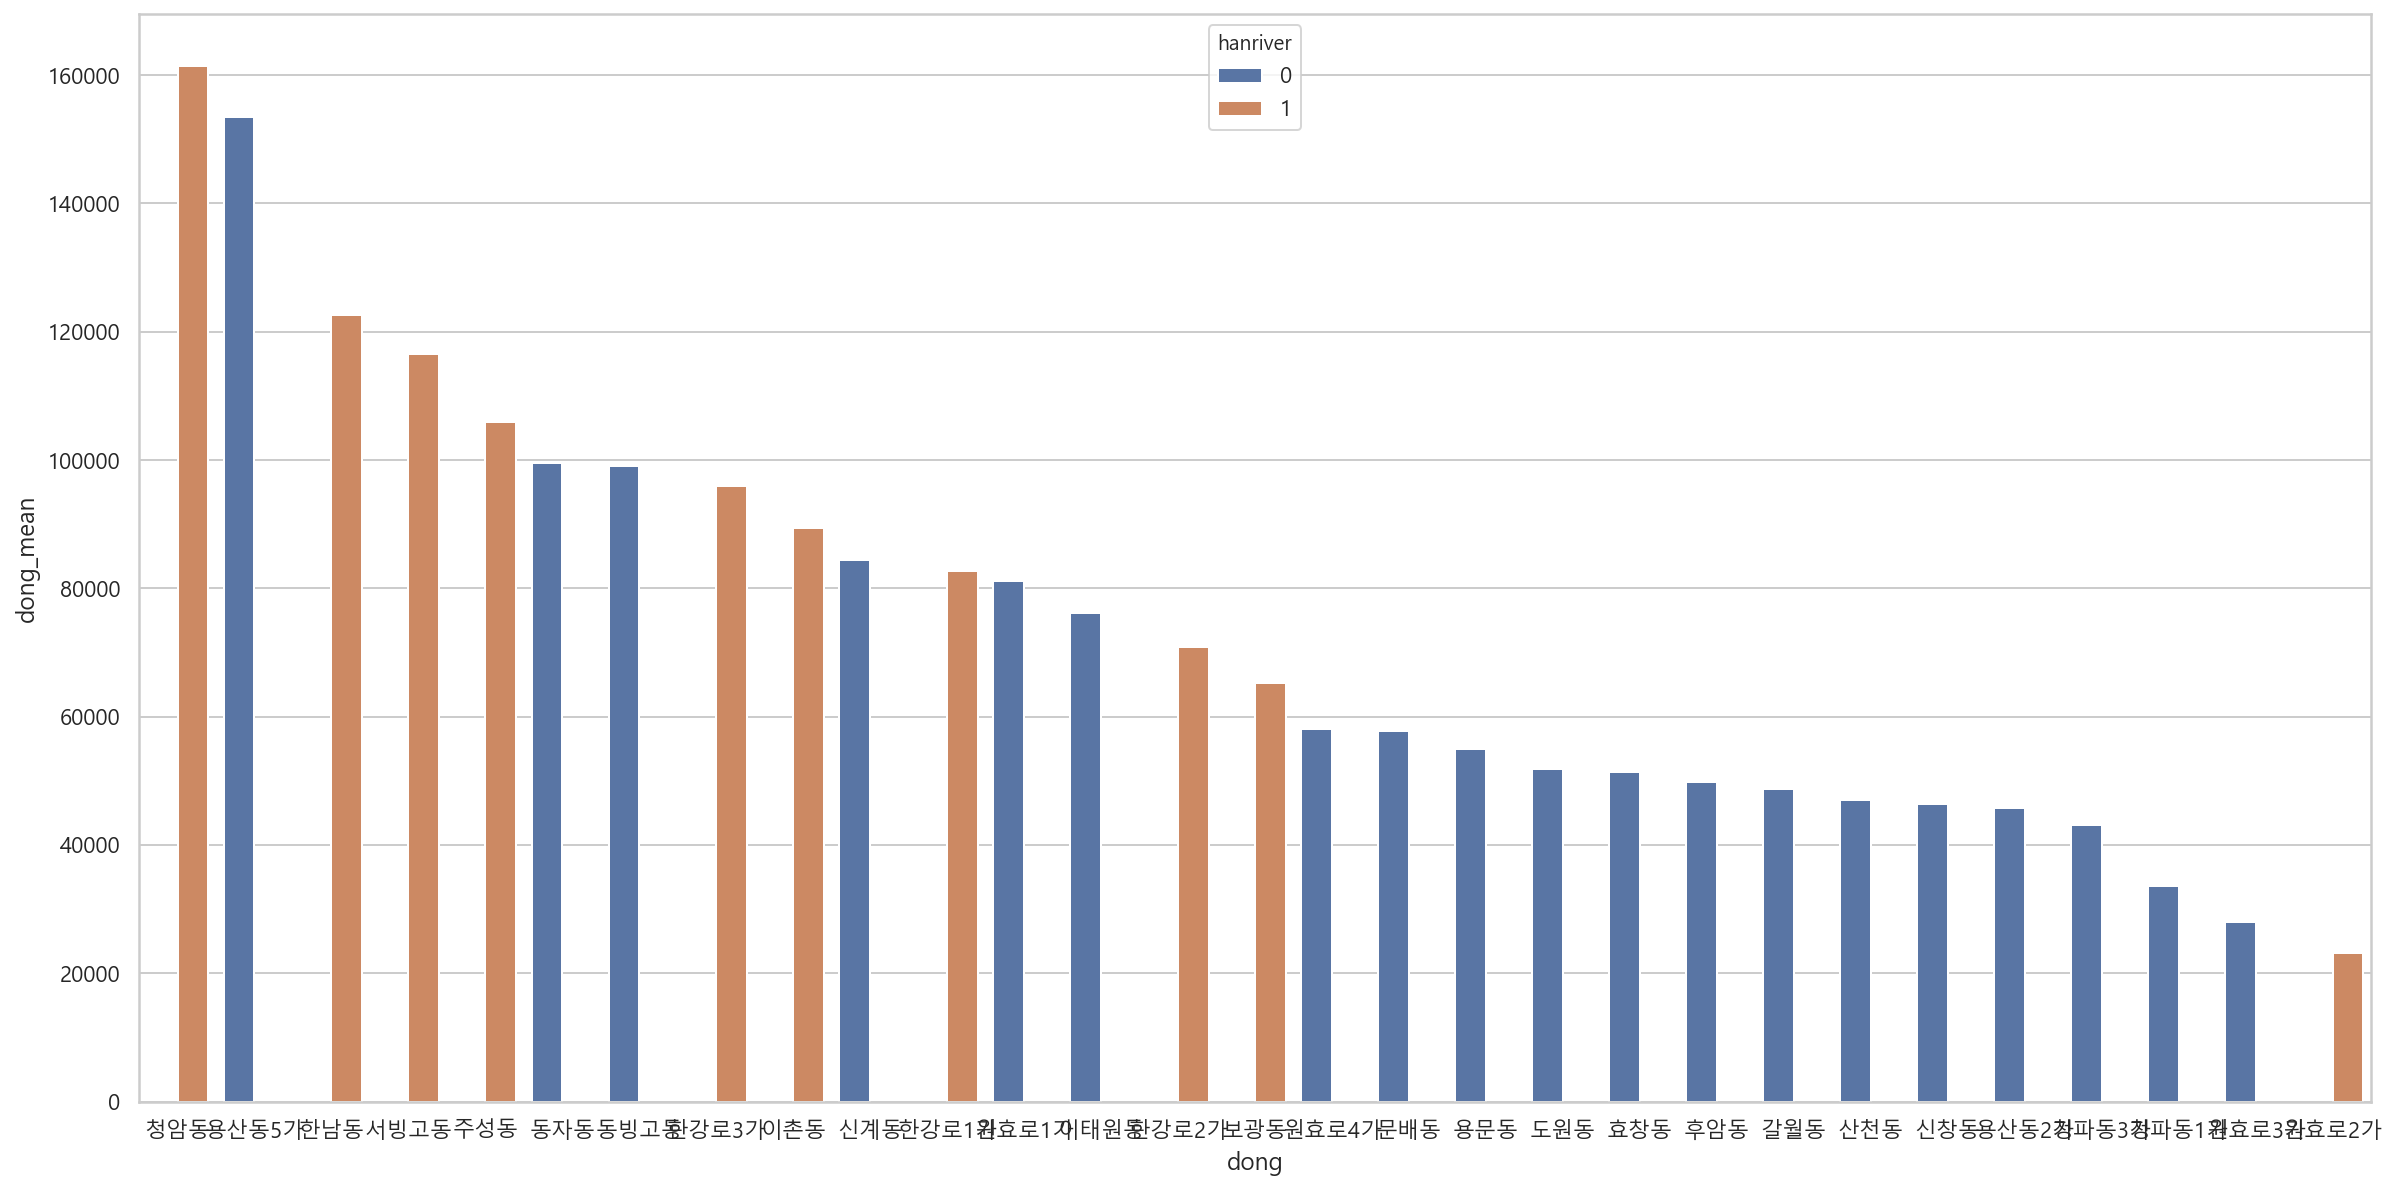

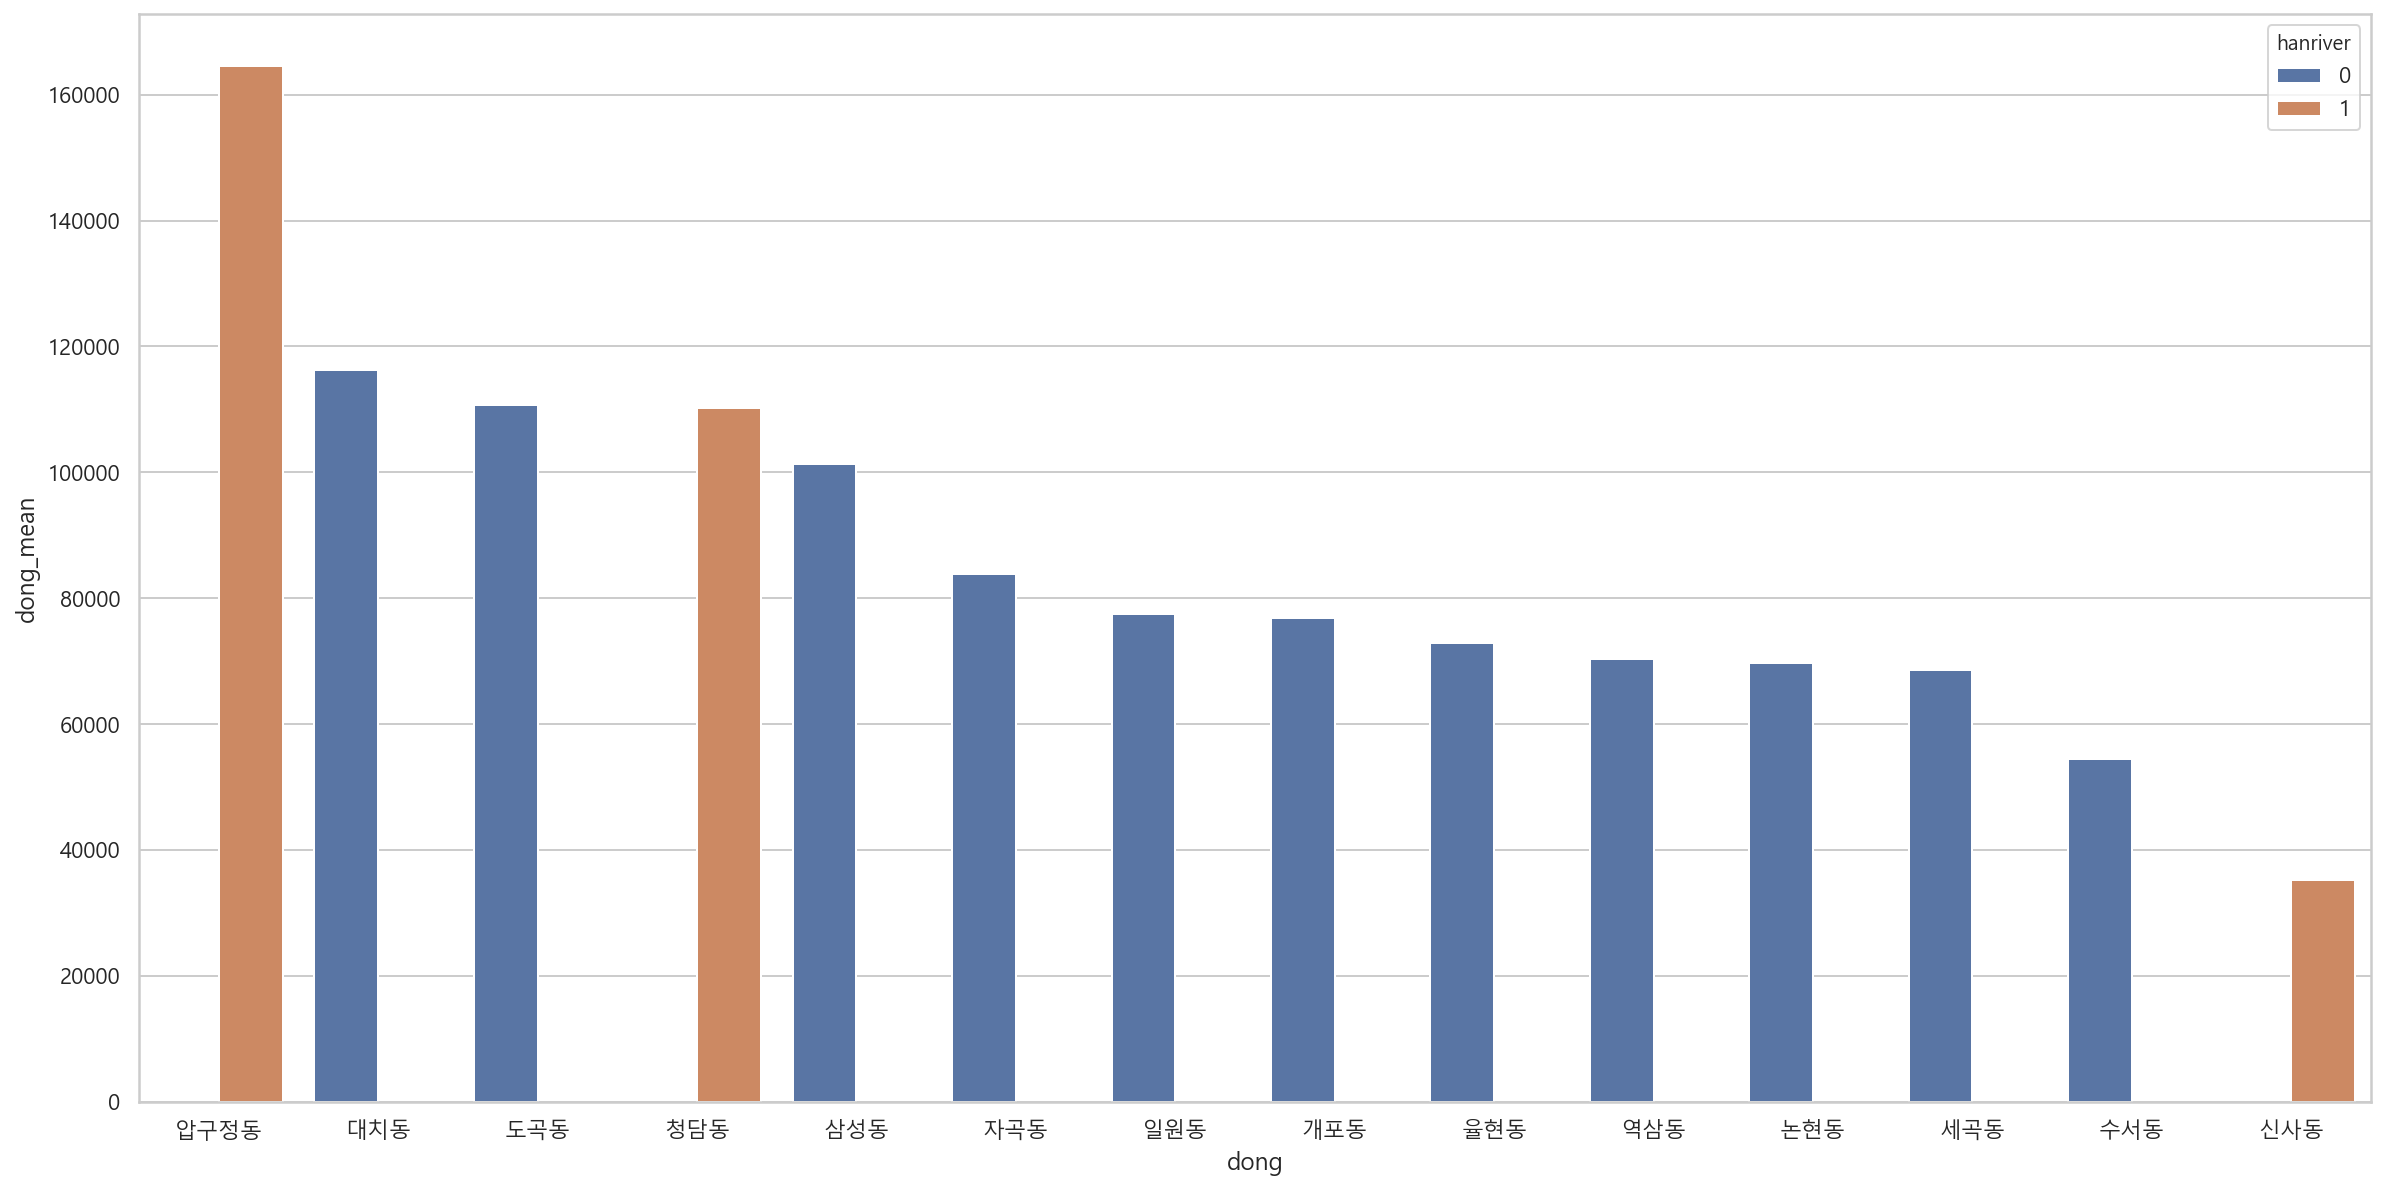

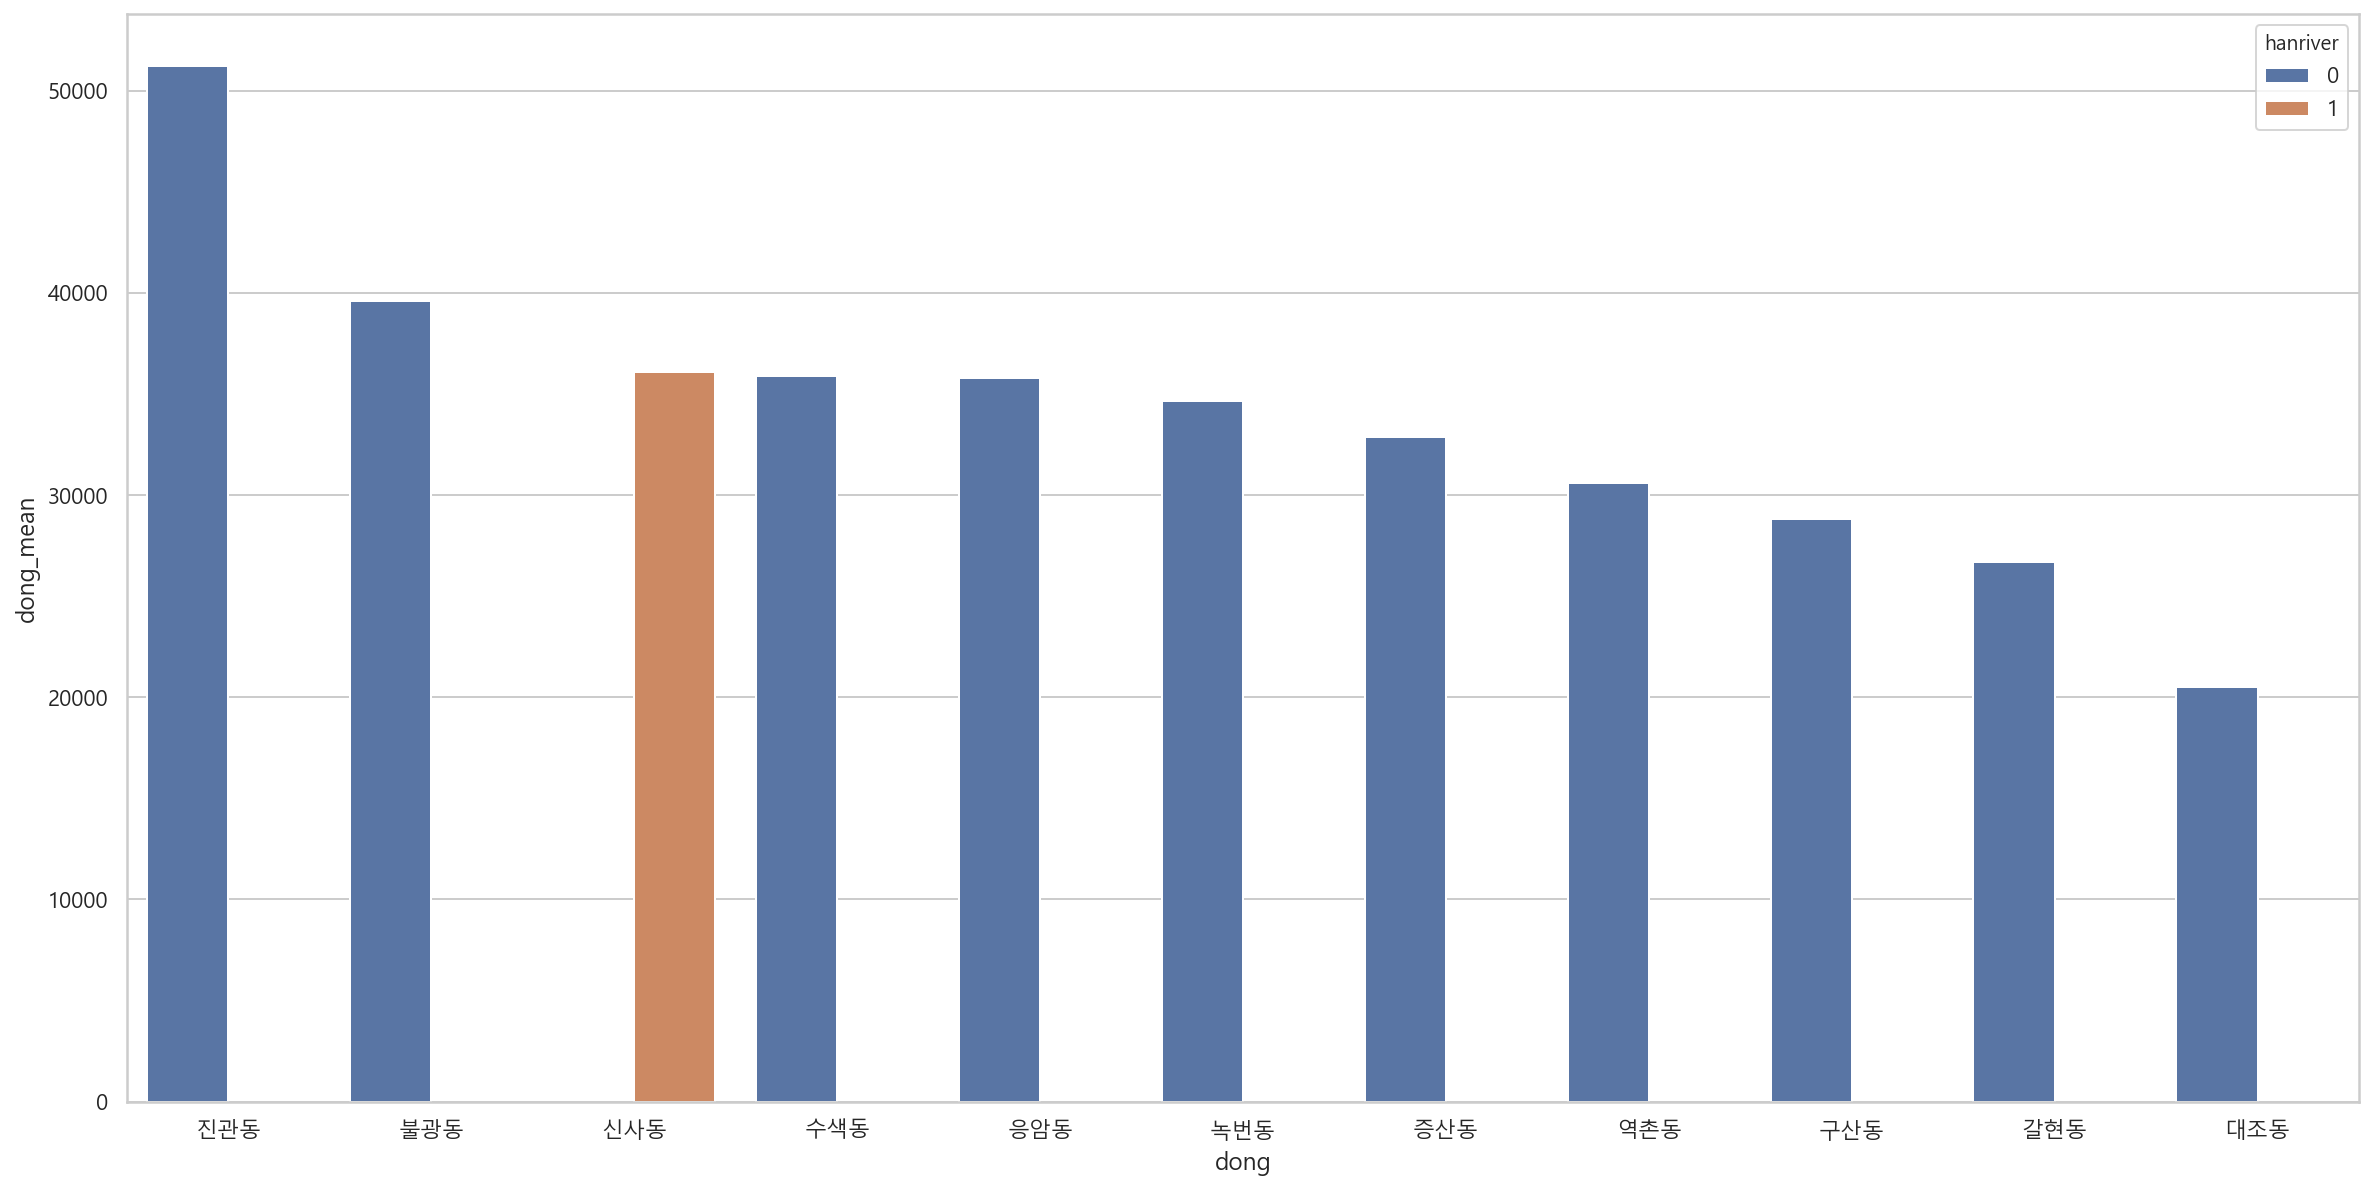

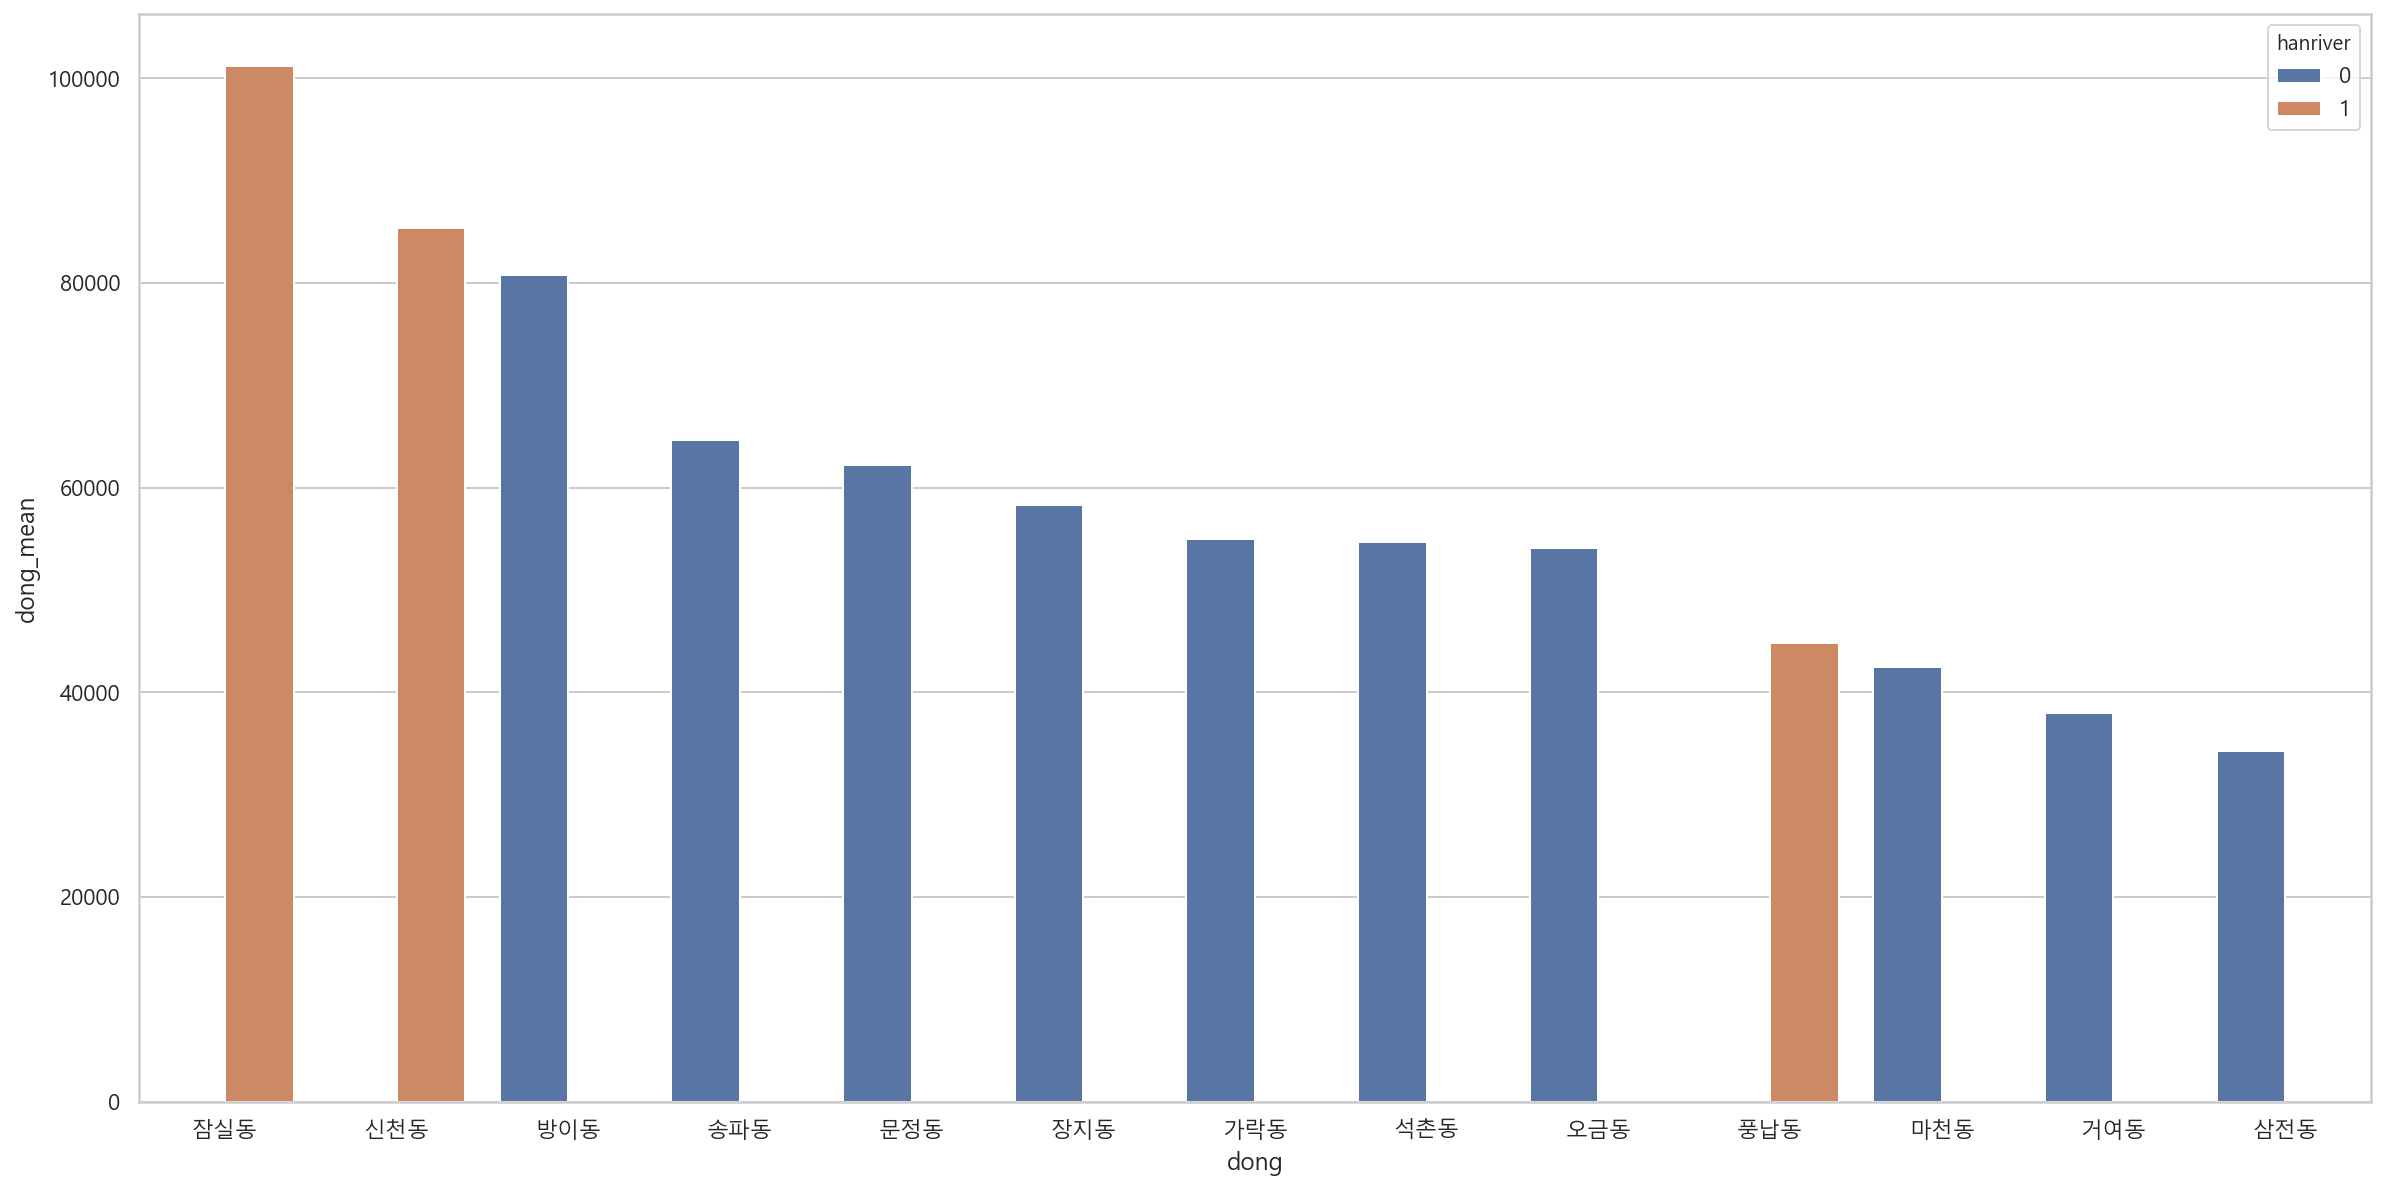

In [10]:
for i in train.loc[train['hanriver'] == 1]['gu'].unique():
    df_nam = df_han.loc[df_han['gu'] == i]
    nam_dong = list(df_nam['dong'].unique())
    df_nam['dong_mean'] = 0
    for i in nam_dong:
        df_nam['dong_mean'] = np.where(df_nam['dong'] == i, round(df_nam.loc[df_nam['dong'] == i]['transaction_real_price'].mean()), df_nam['dong_mean'])
    df_d = df_nam.sort_values(by = ['dong_mean'], ascending = False)[['dong', 'dong_mean', 'hanriver']].drop_duplicates()
    df_d
    plt.figure(figsize=(20,10))
    sns.barplot(data = df_d, x = 'dong', y = 'dong_mean', hue = 'hanriver')

In [11]:
ddd = pd.read_csv('data/train_hakgun_area.csv', encoding = 'euc-kr', index_col = [0])

In [13]:
train.loc[train['dong'] == '시흥동']['gu'].unique()

array(['금천구'], dtype=object)

In [14]:
train['dong'] == '신림동'

0         False
1         False
2         False
3         False
4         False
          ...  
742280    False
742281    False
742282    False
742283    False
742284    False
Name: dong, Length: 742285, dtype: bool

In [16]:
train.to_csv('data/real_train.csv', encoding = 'euc-kr')

In [17]:
train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 742285 entries, 0 to 742284
Data columns (total 31 columns):
 #   Column                    Non-Null Count   Dtype  
---  ------                    --------------   -----  
 0   Unnamed: 0.1              742285 non-null  int64  
 1   gu                        742285 non-null  object 
 2   dong                      742285 non-null  object 
 3   apartment_id              742285 non-null  int64  
 4   apt                       742285 non-null  object 
 5   exclusive_use_area        742285 non-null  float64
 6   year_of_completion        742285 non-null  int64  
 7   floor                     742285 non-null  int64  
 8   transaction_real_price    742285 non-null  int64  
 9   hanriver                  742285 non-null  int64  
 10  transaction_year          742285 non-null  int64  
 11  hakgun                    742285 non-null  int64  
 12  exclusive_use_area_group  742285 non-null  int64  
 13  hakgun_rank               742285 non-null  i

In [72]:
river_re = train.groupby('river_re')[['transaction_real_price']].mean()

river_re = pd.DataFrame(river_re)

train.loc[train['rebuilding'] == 0]['transaction_real_price'].mean()
re = train.groupby('rebuilding')[['transaction_real_price']].mean()
re = pd.DataFrame(re)


In [73]:
re = re.sort_values(by = 'transaction_real_price', ascending = False)
re

,transaction_real_price
rebuilding,
1,77329.833360
0,46832.181343


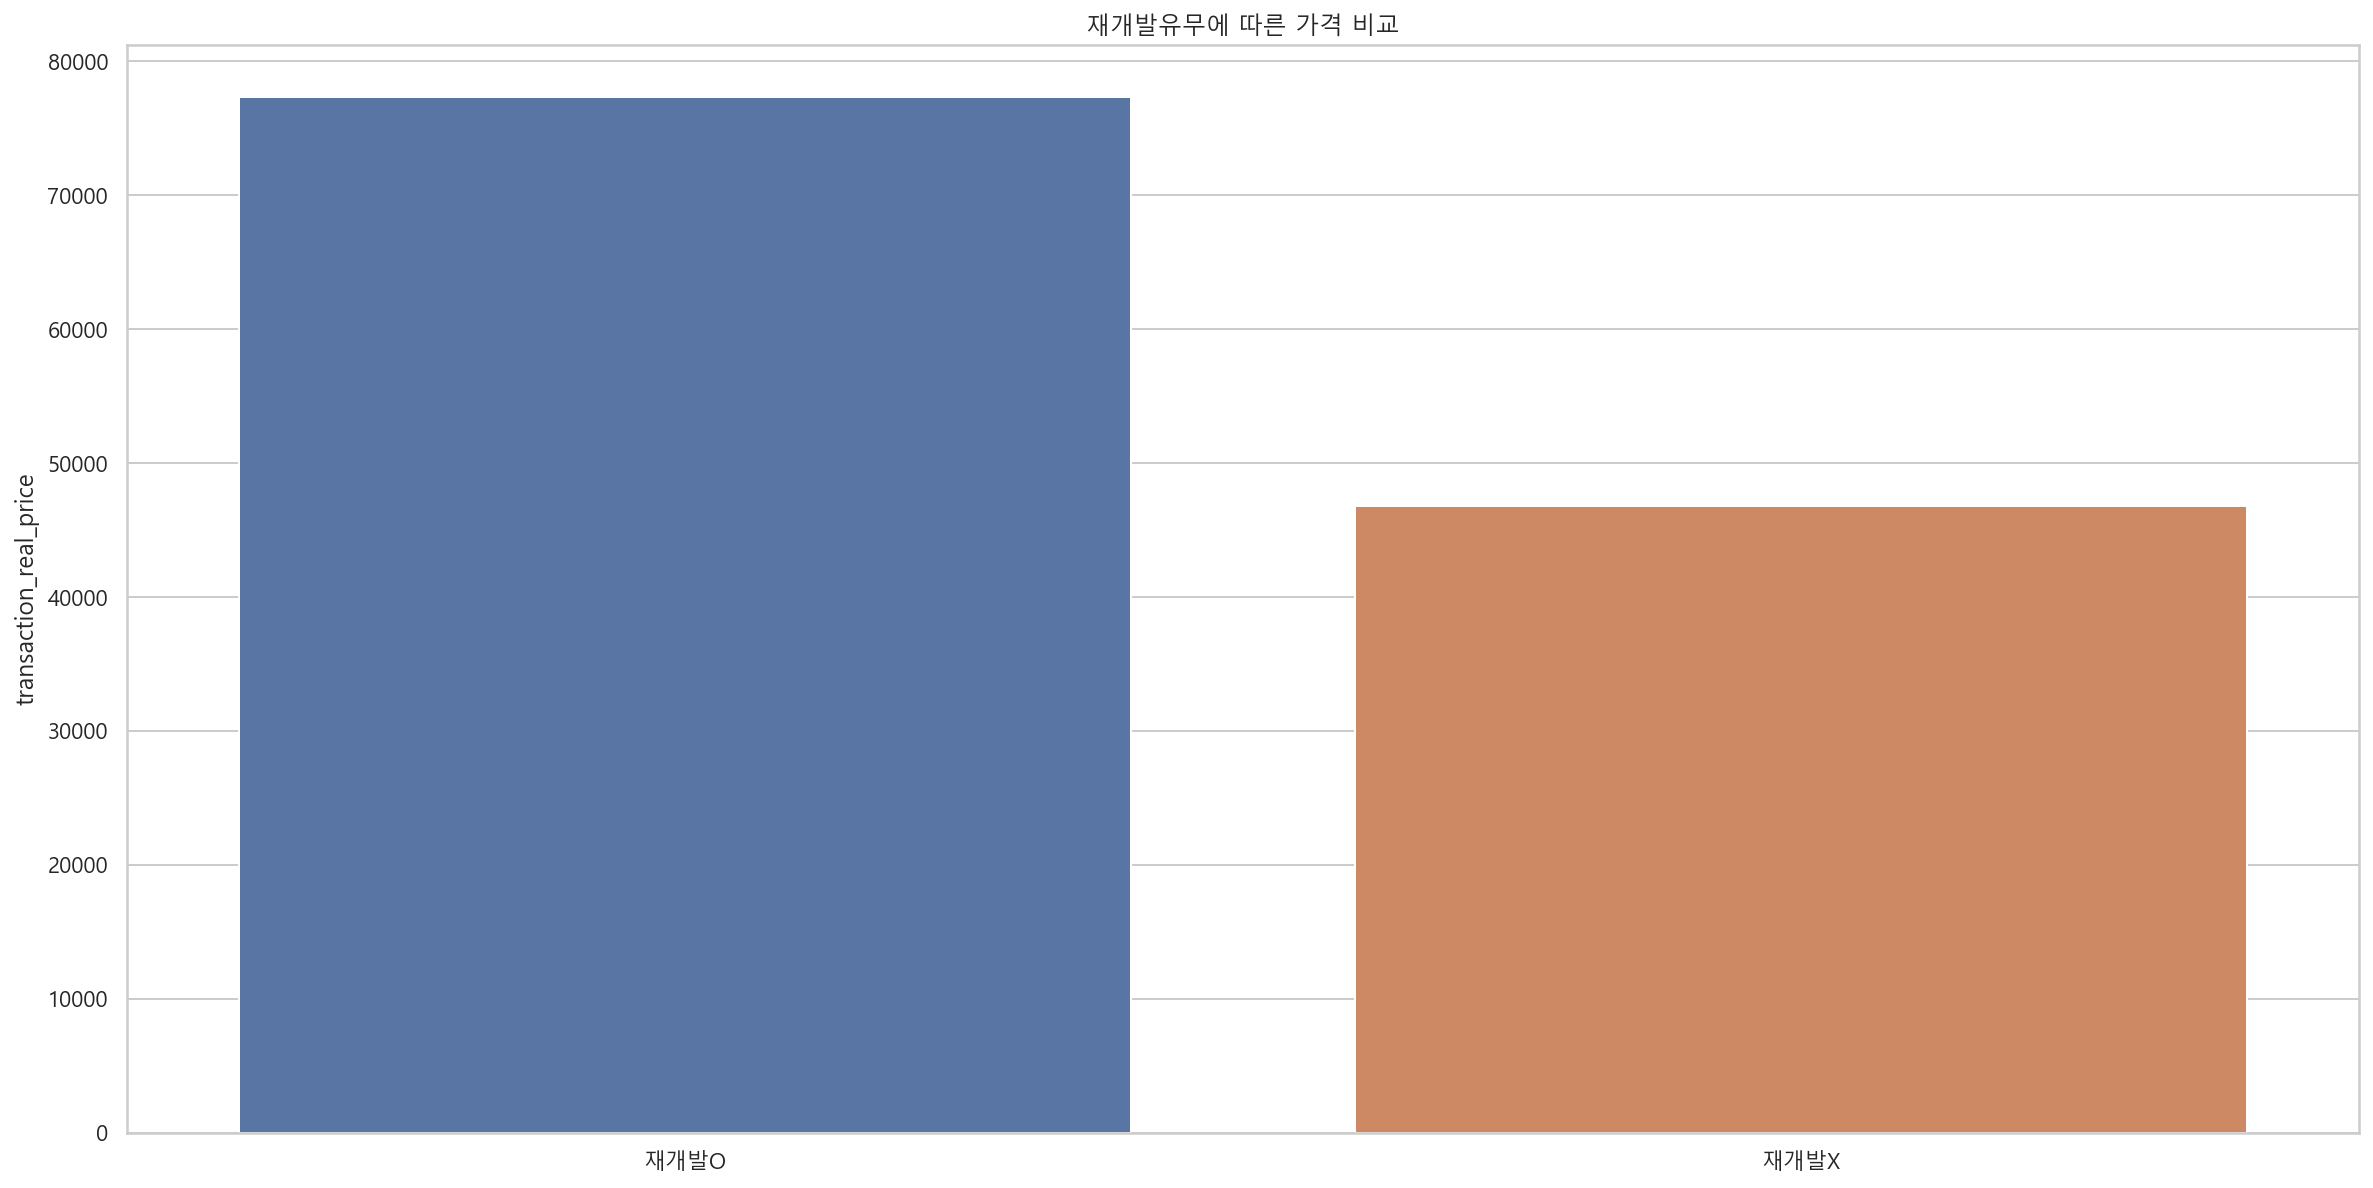

In [75]:
# 한강x , 재개발x -> 1
# 한강x , 재개발x -> 2
# 한강x , 재개발x -> 3
# 한강x , 재개발x -> 4
plt.figure(figsize=(20,10))
plt.title('재개발유무에 따른 가격 비교')
plt.ylabel('평균 거래 가격')

sns.barplot(data = re, x = ['재개발O', '재개발X'], y = 'transaction_real_price' )

In [66]:
train.loc[train['rebuilding'] == 0]['transaction_real_price'].mean()
train.loc[train['rebuilding'] == 1]['transaction_real_price'].mean()


77329.83335969769